In [3]:
import pandas as pd

# قراءة الملفات الثلاثة
df1 = pd.read_csv(r"C:\Users\Access\Downloads\XAUUSD-2015\XAUUSD_Candlestick_1_M_BID_01.01.2015-29.12.2017.csv")
df2 = pd.read_csv(r"C:\Users\Access\Downloads\XAUUSD-2015\XAUUSD_Candlestick_1_M_BID_01.01.2017-31.12.2019.csv")

# التأكد من أن عمود الوقت في صيغة datetime
date_format = "%d.%m.%Y %H:%M:%S.%f"
df1['Gmt time'] = pd.to_datetime(df1['Gmt time'], format=date_format, errors='coerce')
df2['Gmt time'] = pd.to_datetime(df2['Gmt time'], format=date_format, errors='coerce')

# دمج الملفات الثلاثة
merged_df = pd.concat([df1, df2])

# التحقق من القيم غير الصالحة بعد تحويل التاريخ
if merged_df['Gmt time'].isnull().any():
    print("هناك قيم غير صالحة في عمود 'Gmt time'. تحقق من البيانات الأصلية.")

# ترتيب البيانات حسب الوقت
merged_df = merged_df.sort_values(by='Gmt time')

# إعادة تعيين الفهرس بعد الترتيب
merged_df = merged_df.reset_index(drop=True)

# حفظ الملف المدمج
merged_df.to_csv(r"C:\Users\Access\Downloads\XAUUSD-2015\XAUUSD_Candlestick_1_M_BID_2015-1-1_2019-12-31.csv", index=False)

print("تم دمج الملفات وحفظها بنجاح.")


تم دمج الملفات وحفظها بنجاح.


In [5]:
import pandas 
dd = pandas.read_csv(r"C:\Users\Access\Downloads\XAUUSD-2015\XAUUSD_Candlestick_1_M_BID_2015-1-1_2019-12-31.csv")
import pandas as pd

# افترض أن الداتا فريم الخاص بك يسمى df
# لاختيار الأعمدة المطلوبة فقط
df = dd[['Gmt time', 'Open', 'High', 'Low', 'Close']]

In [6]:
df

,Gmt time,Open,High,Low,Close
0,2015-01-01 00:00:00,1183.701,1183.701,1183.701,1183.701
1,2015-01-01 00:01:00,1183.701,1183.701,1183.701,1183.701
2,2015-01-01 00:02:00,1183.701,1183.701,1183.701,1183.701
3,2015-01-01 00:03:00,1183.701,1183.701,1183.701,1183.701
4,2015-01-01 00:04:00,1183.701,1183.701,1183.701,1183.701
...,...,...,...,...,...
2680762,2019-12-31 23:55:00,1516.915,1516.915,1516.915,1516.915
2680763,2019-12-31 23:56:00,1516.915,1516.915,1516.915,1516.915
2680764,2019-12-31 23:57:00,1516.915,1516.915,1516.915,1516.915
2680765,2019-12-31 23:58:00,1516.915,1516.915,1516.915,1516.915


In [7]:
import pandas as pd

# تحميل البيانات
data = df

# إضافة الأعمدة المطلوبة
data['Trade Type'] = None        # نوع الصفقة (شراء/بيع)
data['Entry Price'] = None       # سعر الدخول
data['Target Price'] = None      # سعر الهدف
data['Stop Loss'] = None         # وقف الخسارة
data['Profit/Loss'] = None       # هل ربحت أم خسرت؟
data['Trade Open'] = False       # هل تم فتح صفقة بالفعل عند هذه الشمعة؟

# دالة لتطبيق استراتيجية FVG
def apply_fvg_strategy(df):
    last_trade_index = -1  # لتتبع الشمعة التي فُتحت عندها آخر صفقة

    for i in range(2, len(df)):
        # إذا تم فتح صفقة عند هذه الشمعة، تخطيها
        if df['Trade Open'].iloc[i]:
            continue

        # الشمعة الأولى والثالثة
        high_first = df['High'].iloc[i-2]
        low_first = df['Low'].iloc[i-2]
        high_third = df['High'].iloc[i]
        low_third = df['Low'].iloc[i]
        close_third = df['Close'].iloc[i]

        # المتغيرات الافتراضية
        entry_price = None
        target_price = None
        stop_loss = None
        trade_type = None
        profit_loss = None

        # FVG صعودي
        if low_third > high_first:
            entry_price = high_first
            target_price = low_third
            stop_loss = entry_price - (target_price - entry_price)  # نسبة 1:1
            trade_type = "Buy"

            # حساب الربح/الخسارة
            profit_loss = "Win" if close_third >= target_price else "Loss"

        # FVG هبوطي
        elif high_third < low_first:
            entry_price = low_first
            target_price = high_third
            stop_loss = entry_price + (entry_price - target_price)  # نسبة 1:1
            trade_type = "Sell"

            # حساب الربح/الخسارة
            profit_loss = "Win" if close_third <= target_price else "Loss"

        else:
            # لا توجد صفقة
            continue

        # ضمان عدم تكرار الصفقة لنفس الشمعة
        if last_trade_index != -1 and i - last_trade_index < 3:  # 3 شموع كحد أدنى
            continue

        # تحديث القيم
        df.at[i, 'Trade Type'] = trade_type
        df.at[i, 'Entry Price'] = entry_price
        df.at[i, 'Target Price'] = target_price
        df.at[i, 'Stop Loss'] = stop_loss
        df.at[i, 'Profit/Loss'] = profit_loss
        df.at[i, 'Trade Open'] = True  # وضع علامة بأن الصفقة مفتوحة عند هذه الشمعة

        # تحديث مؤشر الصفقة الأخيرة
        last_trade_index = i

# تطبيق الاستراتيجية
apply_fvg_strategy(data)

# حفظ البيانات المعدلة في ملف جديد
data.to_csv("fvg_strategy_results.csv", index=False)

print("تمت إضافة الأعمدة وحفظ النتائج في ملف fvg_strategy_results.csv")


تمت إضافة الأعمدة وحفظ النتائج في ملف fvg_strategy_results.csv


In [8]:
import pandas as pd
import pandas_ta as ta

# افترض أن df هو الداتا فريم الخاص بك
# تأكد من أن عمود "Gmt time" هو من نوع datetime
df['Gmt time'] = pd.to_datetime(df['Gmt time'])

# تعيين "Gmt time" كفهرس للداتا فريم
df.set_index('Gmt time', inplace=True)

# حساب المتوسطات المتحركة الأسية (EMA)
df['EMA_100'] = ta.ema(df['Close'], length=100)
df['EMA_50'] = ta.ema(df['Close'], length=50)
df['EMA_21'] = ta.ema(df['Close'], length=21)
df['EMA_13'] = ta.ema(df['Close'], length=13)
df['EMA_7'] = ta.ema(df['Close'], length=7)

# حساب مؤشر القوة النسبية (RSI)
df['RSI_10'] = ta.rsi(df['Close'], length=10)

# حساب متوسط النطاق الحقيقي (ATR)
df['ATR_10'] = ta.atr(df['High'], df['Low'], df['Close'], length=10)
df['ATR_30'] = ta.atr(df['High'], df['Low'], df['Close'], length=30)

# إعادة تعيين الفهرس ليكون "Gmt time" كعمود عادي
df.reset_index(inplace=True)

# عرض البيانات مع الأعمدة الجديدة
print(df[['Gmt time', 'Open', 'High', 'Low', 'Close', 'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7', 'RSI_10', 'ATR_10', 'ATR_30']])


                   Gmt time      Open      High       Low     Close  \
0       2015-01-01 00:00:00  1183.701  1183.701  1183.701  1183.701   
1       2015-01-01 00:01:00  1183.701  1183.701  1183.701  1183.701   
2       2015-01-01 00:02:00  1183.701  1183.701  1183.701  1183.701   
3       2015-01-01 00:03:00  1183.701  1183.701  1183.701  1183.701   
4       2015-01-01 00:04:00  1183.701  1183.701  1183.701  1183.701   
...                     ...       ...       ...       ...       ...   
2680762 2019-12-31 23:55:00  1516.915  1516.915  1516.915  1516.915   
2680763 2019-12-31 23:56:00  1516.915  1516.915  1516.915  1516.915   
2680764 2019-12-31 23:57:00  1516.915  1516.915  1516.915  1516.915   
2680765 2019-12-31 23:58:00  1516.915  1516.915  1516.915  1516.915   
2680766 2019-12-31 23:59:00  1516.915  1516.915  1516.915  1516.915   

             EMA_100       EMA_50       EMA_21    EMA_13     EMA_7     RSI_10  \
0                NaN          NaN          NaN       NaN       NaN

In [10]:
df

,Gmt time,Open,High,Low,Close,Trade Type,Entry Price,Target Price,Stop Loss,Profit/Loss,Trade Open,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30
0,2015-01-01 00:00:00,1183.701,1183.701,1183.701,1183.701,None,None,None,None,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 00:01:00,1183.701,1183.701,1183.701,1183.701,None,None,None,None,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 00:02:00,1183.701,1183.701,1183.701,1183.701,None,None,None,None,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01 00:03:00,1183.701,1183.701,1183.701,1183.701,None,None,None,None,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01 00:04:00,1183.701,1183.701,1183.701,1183.701,None,None,None,None,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680762,2019-12-31 23:55:00,1516.915,1516.915,1516.915,1516.915,None,None,None,None,None,False,1517.008131,1516.919795,1516.915004,1516.915,1516.915,33.867017,7.524229e-07,0.002760
2680763,2019-12-31 23:56:00,1516.915,1516.915,1516.915,1516.915,None,None,None,None,None,False,1517.006287,1516.919607,1516.915004,1516.915,1516.915,33.867017,6.771806e-07,0.002668
2680764,2019-12-31 23:57:00,1516.915,1516.915,1516.915,1516.915,None,None,None,None,None,False,1517.004479,1516.919427,1516.915004,1516.915,1516.915,33.867017,6.094626e-07,0.002579
2680765,2019-12-31 23:58:00,1516.915,1516.915,1516.915,1516.915,None,None,None,None,None,False,1517.002707,1516.919253,1516.915003,1516.915,1516.915,33.867017,5.485163e-07,0.002493


In [11]:
import pandas as pd

# افترض أن df هو الداتا فريم الخاص بك

# حذف أول 100 سطر
df = df.iloc[100:]

# إعادة ترتيب الفهرس
df.reset_index(drop=True, inplace=True)

# عرض الداتا فريم بعد التعديل
print(df)


                   Gmt time      Open      High       Low     Close  \
0       2015-01-01 01:40:00  1183.701  1183.701  1183.701  1183.701   
1       2015-01-01 01:41:00  1183.701  1183.701  1183.701  1183.701   
2       2015-01-01 01:42:00  1183.701  1183.701  1183.701  1183.701   
3       2015-01-01 01:43:00  1183.701  1183.701  1183.701  1183.701   
4       2015-01-01 01:44:00  1183.701  1183.701  1183.701  1183.701   
...                     ...       ...       ...       ...       ...   
2680662 2019-12-31 23:55:00  1516.915  1516.915  1516.915  1516.915   
2680663 2019-12-31 23:56:00  1516.915  1516.915  1516.915  1516.915   
2680664 2019-12-31 23:57:00  1516.915  1516.915  1516.915  1516.915   
2680665 2019-12-31 23:58:00  1516.915  1516.915  1516.915  1516.915   
2680666 2019-12-31 23:59:00  1516.915  1516.915  1516.915  1516.915   

        Trade Type Entry Price Target Price Stop Loss Profit/Loss  Trade Open  \
0             None        None         None      None        None 

In [12]:
# حذف الصفوف التي تكون فيها قيمة RSI_10 غير موجودة
df = df.dropna(subset=['RSI_10'])
# إعادة ترتيب الفهرس بعد حذف الصفوف
df = df.reset_index(drop=True)


In [13]:
df

,Gmt time,Open,High,Low,Close,Trade Type,Entry Price,Target Price,Stop Loss,Profit/Loss,Trade Open,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30
0,2015-01-01 23:00:00,1183.949,1184.229,1183.230,1183.409,None,None,None,None,None,False,1183.695218,1183.689549,1183.674455,1183.659286,1183.628000,0.000000,9.990000e-02,0.033300
1,2015-01-01 23:01:00,1183.410,1184.050,1183.409,1183.780,None,None,None,None,None,False,1183.696897,1183.693096,1183.684050,1183.676531,1183.666000,58.535816,1.540100e-01,0.053557
2,2015-01-01 23:02:00,1183.779,1184.029,1183.779,1184.029,None,None,None,None,None,False,1183.703473,1183.706269,1183.715409,1183.726883,1183.756750,71.135681,1.636090e-01,0.060105
3,2015-01-01 23:03:00,1184.089,1184.239,1183.949,1184.110,None,None,None,None,None,False,1183.711523,1183.722101,1183.751281,1183.781614,1183.845062,73.992215,1.762481e-01,0.067768
4,2015-01-01 23:04:00,1184.109,1184.180,1184.039,1184.089,Buy,1184.029,1184.039,1184.019,Win,True,1183.718998,1183.736490,1183.781982,1183.825527,1183.906047,71.941298,1.727233e-01,0.070209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679382,2019-12-31 23:55:00,1516.915,1516.915,1516.915,1516.915,None,None,None,None,None,False,1517.008131,1516.919795,1516.915004,1516.915000,1516.915000,33.867017,7.524229e-07,0.002760
2679383,2019-12-31 23:56:00,1516.915,1516.915,1516.915,1516.915,None,None,None,None,None,False,1517.006287,1516.919607,1516.915004,1516.915000,1516.915000,33.867017,6.771806e-07,0.002668
2679384,2019-12-31 23:57:00,1516.915,1516.915,1516.915,1516.915,None,None,None,None,None,False,1517.004479,1516.919427,1516.915004,1516.915000,1516.915000,33.867017,6.094626e-07,0.002579
2679385,2019-12-31 23:58:00,1516.915,1516.915,1516.915,1516.915,None,None,None,None,None,False,1517.002707,1516.919253,1516.915003,1516.915000,1516.915000,33.867017,5.485163e-07,0.002493


In [14]:
import pandas as pd
import numpy as np



# افترض أن df هو DataFrame الخاص بك
df['Signal'] = np.where((df['EMA_13'] > df['EMA_21']) & (df['EMA_13'].shift(1) <= df['EMA_21'].shift(1)), 1, 0)
df['Signal'] = np.where((df['EMA_13'] < df['EMA_21']) & (df['EMA_13'].shift(1) >= df['EMA_21'].shift(1)), -1, df['Signal'])

df['Take Profit'] = np.where(df['Signal'] == 1, df['Open'] + 0.0015, np.where(df['Signal'] == -1, df['Open'] - 0.0015, 0))
df['Stop Loss'] = np.where(df['Signal'] == 1, df['Open'] - 0.0005, np.where(df['Signal'] == -1, df['Open'] + 0.0005, 0))

df['Result'] = ''
for i in range(len(df)):
    if df.at[i, 'Signal'] != 0:
        take_profit = df.at[i, 'Take Profit']
        stop_loss = df.at[i, 'Stop Loss']
        if df.at[i, 'Signal'] == 1:
            win_condition = (df['High'][i+1:] >= take_profit).idxmax()
            loss_condition = (df['Low'][i+1:] <= stop_loss).idxmax()
        else:
            win_condition = (df['Low'][i+1:] <= take_profit).idxmax()
            loss_condition = (df['High'][i+1:] >= stop_loss).idxmax()
        
        if win_condition < loss_condition:
            df.at[i, 'Result'] = 'WIN' #win
        elif loss_condition < win_condition:
            df.at[i, 'Result'] = 'LOSS' #loss
        else:
            df.at[i, 'Result'] = 'NONE' #non


# عرض النتائج النهائية
df


,Gmt time,Open,High,Low,Close,Trade Type,Entry Price,Target Price,Stop Loss,Profit/Loss,...,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Result
0,2015-01-01 23:00:00,1183.949,1184.229,1183.230,1183.409,None,None,None,0.0000,None,...,1183.689549,1183.674455,1183.659286,1183.628000,0.000000,9.990000e-02,0.033300,0,0.0000,
1,2015-01-01 23:01:00,1183.410,1184.050,1183.409,1183.780,None,None,None,0.0000,None,...,1183.693096,1183.684050,1183.676531,1183.666000,58.535816,1.540100e-01,0.053557,0,0.0000,
2,2015-01-01 23:02:00,1183.779,1184.029,1183.779,1184.029,None,None,None,1183.7785,None,...,1183.706269,1183.715409,1183.726883,1183.756750,71.135681,1.636090e-01,0.060105,1,1183.7805,WIN
3,2015-01-01 23:03:00,1184.089,1184.239,1183.949,1184.110,None,None,None,0.0000,None,...,1183.722101,1183.751281,1183.781614,1183.845062,73.992215,1.762481e-01,0.067768,0,0.0000,
4,2015-01-01 23:04:00,1184.109,1184.180,1184.039,1184.089,Buy,1184.029,1184.039,0.0000,Win,...,1183.736490,1183.781982,1183.825527,1183.906047,71.941298,1.727233e-01,0.070209,0,0.0000,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679382,2019-12-31 23:55:00,1516.915,1516.915,1516.915,1516.915,None,None,None,0.0000,None,...,1516.919795,1516.915004,1516.915000,1516.915000,33.867017,7.524229e-07,0.002760,0,0.0000,
2679383,2019-12-31 23:56:00,1516.915,1516.915,1516.915,1516.915,None,None,None,0.0000,None,...,1516.919607,1516.915004,1516.915000,1516.915000,33.867017,6.771806e-07,0.002668,0,0.0000,
2679384,2019-12-31 23:57:00,1516.915,1516.915,1516.915,1516.915,None,None,None,0.0000,None,...,1516.919427,1516.915004,1516.915000,1516.915000,33.867017,6.094626e-07,0.002579,0,0.0000,
2679385,2019-12-31 23:58:00,1516.915,1516.915,1516.915,1516.915,None,None,None,0.0000,None,...,1516.919253,1516.915003,1516.915000,1516.915000,33.867017,5.485163e-07,0.002493,0,0.0000,


In [15]:
df[1500:2060]

,Gmt time,Open,High,Low,Close,Trade Type,Entry Price,Target Price,Stop Loss,Profit/Loss,...,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Result
1500,2015-01-03 00:00:00,1188.281,1188.281,1188.281,1188.281,Sell,1188.354,1188.281,0.0,Win,...,1188.349235,1188.347365,1188.343571,1188.335750,0.002177,7.300570e-03,6.264812e-03,0,0.0,
1501,2015-01-03 00:01:00,1188.281,1188.281,1188.281,1188.281,None,None,None,0.0,None,...,1188.346559,1188.341331,1188.334633,1188.322063,0.002177,6.570513e-03,6.055985e-03,0,0.0,
1502,2015-01-03 00:02:00,1188.281,1188.281,1188.281,1188.281,None,None,None,0.0,None,...,1188.343988,1188.335847,1188.326971,1188.311797,0.002177,5.913462e-03,5.854119e-03,0,0.0,
1503,2015-01-03 00:03:00,1188.281,1188.281,1188.281,1188.281,None,None,None,0.0,None,...,1188.341518,1188.330861,1188.320404,1188.304098,0.002177,5.322115e-03,5.658981e-03,0,0.0,
1504,2015-01-03 00:04:00,1188.281,1188.281,1188.281,1188.281,None,None,None,0.0,None,...,1188.339144,1188.326328,1188.314774,1188.298323,0.002177,4.789904e-03,5.470349e-03,0,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,2015-01-03 09:15:00,1188.281,1188.281,1188.281,1188.281,None,None,None,0.0,None,...,1188.281000,1188.281000,1188.281000,1188.281000,0.002177,2.220446e-16,4.221850e-11,0,0.0,
2056,2015-01-03 09:16:00,1188.281,1188.281,1188.281,1188.281,None,None,None,0.0,None,...,1188.281000,1188.281000,1188.281000,1188.281000,0.002177,2.220446e-16,4.081122e-11,0,0.0,
2057,2015-01-03 09:17:00,1188.281,1188.281,1188.281,1188.281,None,None,None,0.0,None,...,1188.281000,1188.281000,1188.281000,1188.281000,0.002177,2.220446e-16,3.945086e-11,0,0.0,
2058,2015-01-03 09:18:00,1188.281,1188.281,1188.281,1188.281,None,None,None,0.0,None,...,1188.281000,1188.281000,1188.281000,1188.281000,0.002177,2.220446e-16,3.813583e-11,0,0.0,


In [16]:
df['Result'] = df['Result'].replace("", "NONE")


In [21]:
df[130:180]

,Gmt time,Open,High,Low,Close,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result
130,2019-01-02 00:10:00,0.70461,0.70461,0.70438,0.70446,0.704632,0.704640,0.704598,0.704569,0.704541,40.788500,0.000129,0.000103,0,0.00000,0.00000,NONE
131,2019-01-02 00:11:00,0.70447,0.70449,0.70438,0.70439,0.704627,0.704630,0.704580,0.704544,0.704503,37.169685,0.000127,0.000103,0,0.00000,0.00000,NONE
132,2019-01-02 00:12:00,0.70438,0.70447,0.70436,0.70444,0.704623,0.704623,0.704567,0.704529,0.704488,41.302782,0.000125,0.000104,0,0.00000,0.00000,NONE
133,2019-01-02 00:13:00,0.70445,0.70445,0.70437,0.70437,0.704618,0.704613,0.704549,0.704506,0.704458,37.468707,0.000121,0.000103,0,0.00000,0.00000,NONE
134,2019-01-02 00:14:00,0.70436,0.70448,0.70436,0.70447,0.704615,0.704607,0.704542,0.704501,0.704461,45.499223,0.000121,0.000103,0,0.00000,0.00000,NONE
135,2019-01-02 00:15:00,0.70447,0.70449,0.70432,0.70437,0.704610,0.704598,0.704526,0.704482,0.704438,39.817529,0.000126,0.000106,0,0.00000,0.00000,NONE
136,2019-01-02 00:16:00,0.70438,0.70451,0.70438,0.70447,0.704608,0.704593,0.704521,0.704480,0.704446,47.150386,0.000127,0.000107,0,0.00000,0.00000,NONE
137,2019-01-02 00:17:00,0.70447,0.70456,0.70446,0.70446,0.704605,0.704588,0.704516,0.704478,0.704450,46.520581,0.000124,0.000107,0,0.00000,0.00000,NONE
138,2019-01-02 00:18:00,0.70445,0.70446,0.70438,0.70445,0.704602,0.704582,0.704510,0.704474,0.704450,45.840243,0.000120,0.000106,0,0.00000,0.00000,NONE
139,2019-01-02 00:19:00,0.70446,0.70455,0.70445,0.70455,0.704601,0.704581,0.704513,0.704485,0.704475,53.410720,0.000118,0.000105,0,0.00000,0.00000,NONE


In [19]:
df

,Gmt time,Open,High,Low,Close,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result
0,2019-01-01 22:00:00,0.70519,0.70519,0.70519,0.70519,0.704112,0.704133,0.704190,0.704247,0.704365,100.000000,0.000110,0.000037,0,0.0,0.0,
1,2019-01-01 22:01:00,0.70520,0.70520,0.70520,0.70520,0.704133,0.704175,0.704282,0.704383,0.704574,100.000000,0.000100,0.000036,0,0.0,0.0,
2,2019-01-01 22:02:00,0.70519,0.70519,0.70463,0.70465,0.704144,0.704194,0.704315,0.704421,0.704593,62.068966,0.000147,0.000054,0,0.0,0.0,
3,2019-01-01 22:03:00,0.70465,0.70466,0.70459,0.70460,0.704153,0.704210,0.704341,0.704447,0.704595,59.778598,0.000139,0.000054,0,0.0,0.0,
4,2019-01-01 22:04:00,0.70477,0.70477,0.70476,0.70477,0.704165,0.704232,0.704380,0.704493,0.704638,64.699532,0.000142,0.000058,0,0.0,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078062,2024-11-18 21:55:00,0.65074,0.65075,0.65073,0.65073,0.650494,0.650683,0.650750,0.650774,0.650785,45.616022,0.000051,0.000061,0,0.0,0.0,
2078063,2024-11-18 21:56:00,0.65072,0.65074,0.65071,0.65072,0.650498,0.650684,0.650747,0.650766,0.650769,44.121304,0.000049,0.000060,0,0.0,0.0,
2078064,2024-11-18 21:57:00,0.65073,0.65073,0.65067,0.65069,0.650502,0.650685,0.650742,0.650755,0.650749,39.776708,0.000050,0.000060,0,0.0,0.0,
2078065,2024-11-18 21:58:00,0.65069,0.65075,0.65066,0.65072,0.650507,0.650686,0.650740,0.650750,0.650742,45.715947,0.000054,0.000061,0,0.0,0.0,


In [22]:
df.to_csv(r"C:\Users\Access\Downloads\AUDUSD-2019\AUDUSD_Candlestick_1_M_BID_2019-1-1_2024-11-18_ta_15-5.csv", index=False)

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# استبدل 'eurusd_ema_13_31_tp_4_sl_4.csv' باسم ملف البيانات الخاص بك
#data = pd.read_csv(r"C:\Users\Access\Downloads\AUDUSD_undersampled.csv")
data = df
# تحضير البيانات
#data = data[data['Result'] != "NONE"]
#data['Result'] = data['Result'].map({'WIN': 2, 'LOSS': 1, 'NONE': 0})

# الميزات X
X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]

y = data['Result']

# تقسيم البيانات للتصنيف
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تطبيع البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# إنشاء نموذج DNN باستخدام Keras
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # عدد الأعمدة في X
    tf.keras.layers.Dense(64, activation='relu'),  # الطبقة الأولى
    tf.keras.layers.Dropout(0.1),  # لتقليل الإفراط في التكيف
    tf.keras.layers.Dense(128, activation='relu'),  # الطبقة الثانية
    tf.keras.layers.Dense(32, activation='relu'),  # الطبقة الثالثة
    tf.keras.layers.Dense(1, activation='sigmoid')  # الطبقة النهائية (للتصنيف الثنائي: رابح أو خاسر)
])

# تجميع النموذج
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج

history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))

# تقييم النموذج
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)  # تحويل الاحتمالات إلى فئات (0 أو 1)

# طباعة تقرير التصنيف
print(classification_report(y_test, y_pred_labels))

# حساب دقة التوقعات
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"دقة التوقعات: {accuracy * 100:.2f}%")

# عرض الرسم البياني لدورة التدريب
plt.plot(history.history['accuracy'], label='دقة التدريب')
plt.plot(history.history['val_accuracy'], label='دقة التحقق')
plt.title('دقة التدريب والتحقق')
plt.xlabel('عدد العصور (Epochs)')
plt.ylabel('الدقة')
plt.legend()
plt.show()


C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5


UnimplementedError: Graph execution error:

Detected at node compile_loss/binary_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "C:\ProgramData\anaconda3\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Access\AppData\Local\Temp\ipykernel_23836\3931838817.py", line 46, in <module>

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\trainer.py", line 359, in _compute_loss

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\trainer.py", line 327, in compute_loss

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\compile_utils.py", line 611, in __call__

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\compile_utils.py", line 652, in call

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\loss.py", line 56, in __call__

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\tree\tree_api.py", line 148, in map_structure

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\tree\optree_impl.py", line 79, in map_structure

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\optree\ops.py", line 747, in tree_map

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\loss.py", line 57, in <lambda>

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\core.py", line 822, in convert_to_tensor

  File "C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\core.py", line 132, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/binary_crossentropy/Cast}}]] [Op:__inference_one_step_on_iterator_5373]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3785

    accuracy                           1.00      3785
   macro avg       1.00      1.00      1.00      3785
weighted avg       1.00      1.00      1.00      3785

دقة التوقعات: 100.00%


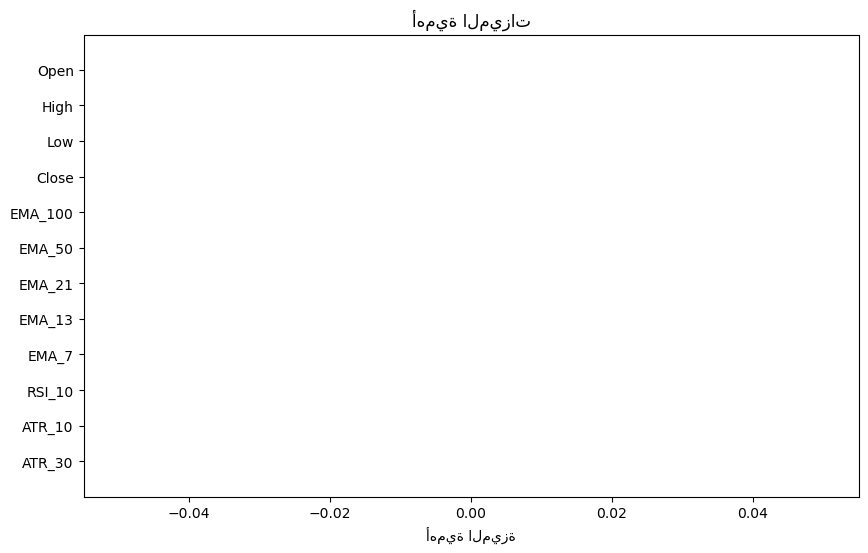

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# استبدل 'eurusd_ema_13_31_tp_4_sl_4.csv' باسم ملف البيانات الخاص بك
data = pd.read_csv(r"C:\Users\Access\Downloads\AUDUSD-2019\AUDUSD_Candlestick_1_M_BID_2019-1-1_2024-11-18_ta_15-5.csv")

# تحضير البيانات
data = data[data['Result'] != "NONE"]
data = data[data['Result'] != "LOSS"]

data['Result'] = data['Result'].map({'WIN': 1})

# الميزات X
X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]

y = data['Result']

# تقسيم البيانات للتصنيف
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تطبيع البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# إنشاء نموذج Random Forest
model = RandomForestClassifier(n_estimators=500, random_state=42)

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ باستخدام النموذج
y_pred = model.predict(X_test)

# طباعة تقرير التصنيف
print(classification_report(y_test, y_pred))

# حساب دقة التوقعات
accuracy = accuracy_score(y_test, y_pred)
print(f"دقة التوقعات: {accuracy * 100:.2f}%")

# عرض الرسم البياني لأهمية الميزات (Feature Importance)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("أهمية الميزات")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), [X.columns[i] for i in indices])
plt.xlabel("أهمية الميزة")
plt.show()


              precision    recall  f1-score   support

           0       0.71      0.94      0.81      9094
           1       0.39      0.09      0.15      3803

    accuracy                           0.69     12897
   macro avg       0.55      0.52      0.48     12897
weighted avg       0.62      0.69      0.61     12897

دقة التوقعات: 68.99%


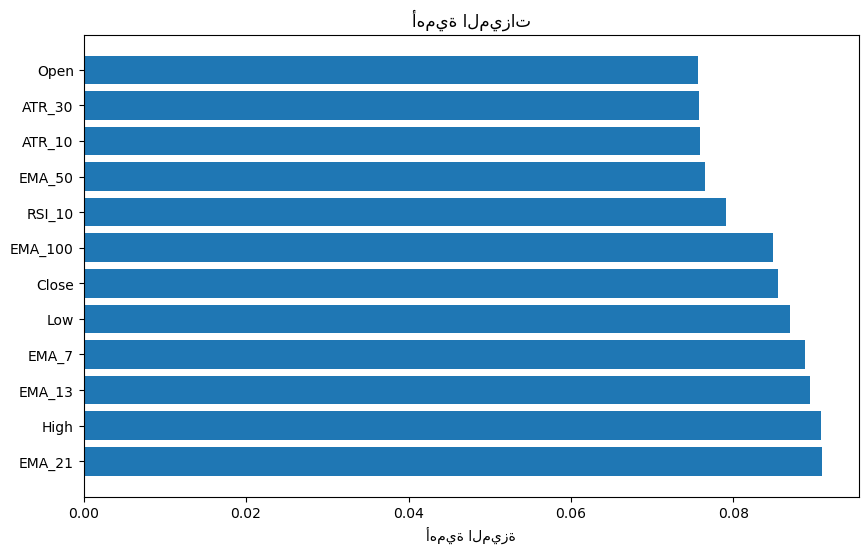

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt

# استبدل 'eurusd_ema_13_31_tp_4_sl_4.csv' باسم ملف البيانات الخاص بك
data = pd.read_csv(r"C:\Users\Access\Downloads\AUDUSD-2019\AUDUSD_Candlestick_1_M_BID_2019-1-1_2024-11-18_ta_15-5.csv")

# تحضير البيانات
data = data[data['Result'] != "NONE"]
data['Result'] = data['Result'].map({'WIN': 1, 'LOSS': 0})

# الميزات X
X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]

y = data['Result']

# تقسيم البيانات للتصنيف
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تطبيع البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# إنشاء نموذج XGBoost
model = xgb.XGBClassifier(n_estimators=300, random_state=42)  # scale_pos_weight يساعد في التعامل مع البيانات غير المتوازنة

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ باستخدام النموذج
y_pred = model.predict(X_test)

# طباعة تقرير التصنيف
print(classification_report(y_test, y_pred))

# حساب دقة التوقعات
accuracy = accuracy_score(y_test, y_pred)
print(f"دقة التوقعات: {accuracy * 100:.2f}%")

# عرض الرسم البياني لأهمية الميزات (Feature Importance)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("أهمية الميزات")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), [X.columns[i] for i in indices])
plt.xlabel("أهمية الميزة")
plt.show()


In [58]:
print("Unique values in y_train:", y_train.unique())
print("Value counts in y_train:\n", y_train.value_counts())


Unique values in y_train: [1 0]
Value counts in y_train:
 Result
0    36449
1    15137
Name: count, dtype: int64


In [41]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# استبدل 'eurusd_ema_13_31_tp_4_sl_4.csv' باسم ملف البيانات الخاص بك والذي يحتوي على جميع الصفقات
data = pd.read_csv(r"C:\Users\Access\Downloads\AUDUSD-2019\AUDUSD_Candlestick_1_M_BID_2019-1-1_2024-11-18_ta_15-5.csv")

data = data[data['Result'] != "NONE"]
data['Result'] = data['Result'].map({'WIN': 1, 'LOSS': 0})

# الميزات X
X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]

y = data['Result']

# تقسيم البيانات للتصنيف (تصنيف الصفقات)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y, test_size=0.2, random_state=42)

# إنشاء مجموعة بيانات LightGBM للتصنيف
train_data_clf = lgb.Dataset(X_train_clf, label=y_train_clf)
test_data_clf = lgb.Dataset(X_test_clf, label=y_test_clf)

# تحديد المعلمات للتصنيف
params_clf = {
    'objective': 'multiclass',
    'num_class': 2,  # ثلاث فئات: رابحة، خاسرة، لم تفتح
    'metric': 'multi_logloss',
    'learning_rate': 0.01,
    'num_leaves': 50,
    'verbose': -1
}

# تدريب النموذج 
model_clf = lgb.train(
    params_clf,
    train_data_clf,
    num_boost_round=10000,
    valid_sets=[test_data_clf],
    valid_names=['valid'],
)

# التنبؤ على بيانات الاختبار
y_pred_clf = model_clf.predict(X_test_clf)

# مثال لتحويل القيم المتوقعة إلى فئات:
y_pred_clf_labels = np.round(y_pred_clf).astype(int)  # تحويل الأرقام المستمرة إلى فئات (0 أو 1 أو 2)


# تحويل الاحتمالات إلى فئات (0, 1, 2)
y_pred_clf_labels = np.argmax(y_pred_clf, axis=1)

print(classification_report(y_test_clf, y_pred_clf_labels))

# افترض أن y_pred_clf_labels هي التوقعات بعد التحويل
y_pred_clf_labels = np.argmax(y_pred_clf, axis=1)

# حساب عدد القيم 0, 1, 2 في y_pred_clf_labels
counts_pred = np.bincount(y_pred_clf_labels)

# حساب عدد القيم 0, 1, 2 في y_test_clf
counts_test = np.bincount(y_test_clf)

# تحويل العدادات إلى DataFrame
df_counts_pred = pd.DataFrame(counts_pred, columns=['Count'], index=[0, 1])
df_counts_test = pd.DataFrame(counts_test, columns=['Count'], index=[0, 1])

# عرض النتائج
print("عدد القيم في y_pred_clf_labels:")
print(df_counts_pred)
print("\nعدد القيم في y_test_clf:")
print(df_counts_test)

#--------------------------------------------------------------------------------

# حساب دقة التوقعات
accuracy = accuracy_score(y_test_clf, y_pred_clf_labels)

# طباعة الدقة كنسبة مئوية
print(f"دقة التوقعات: {accuracy * 100:.2f}%")



              precision    recall  f1-score   support

           0       0.71      0.93      0.81      9094
           1       0.39      0.10      0.16      3803

    accuracy                           0.69     12897
   macro avg       0.55      0.52      0.48     12897
weighted avg       0.62      0.69      0.62     12897

عدد القيم في y_pred_clf_labels:
   Count
0  11908
1    989

عدد القيم في y_test_clf:
   Count
0   9094
1   3803
دقة التوقعات: 68.77%


In [14]:
# حفظ النموذج إلى ملف
model_clf.save_model(r'C:\Users\Access\Downloads\AUDUSD-2019\lightgbm_model_cls_audusd.txt')  # حفظ النموذج في ملف نصي

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 30081, number of used features: 12
[LightGBM] [Info] Start training from score 0.692914


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.0011556269753642226


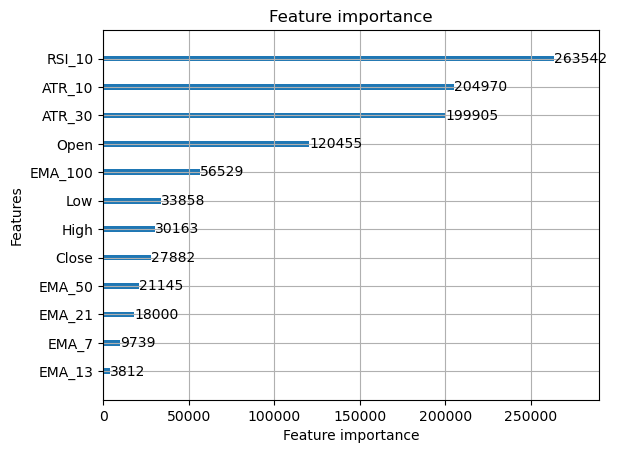

In [15]:
# استيراد المكتبات اللازمة
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# قراءة البيانات
# استبدل 'data.csv' باسم ملف البيانات الخاص بك
data = pd.read_csv(r"C:\Users\Access\Downloads\AUDUSD-2019\AUDUSD_Candlestick_1_M_BID_2019-1-1_2024-11-18_ta.csv")

# حذف السطور التي تحتوي على 'LOSS' أو 'NONE' في عمود 'Result'
data = df[~df['Result'].isin(['LOSS', 'NONE'])]

# تجهيز الميزات (X) والأهداف (y)
# الميزات X

X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]

# الهدف y - اختر الهدف الذي تريد التنبؤ به
# لنفترض أننا نريد التنبؤ بـ 'Take Profit'
y = data['Take Profit']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء مجموعة بيانات LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# تحديد المعلمات للانحدار
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.20,
    'num_leaves': 100,
    'verbose': 1
}

# تدريب النموذج بدون الإيقاف المبكر
model = lgb.train(
    params,
    train_data,
    num_boost_round=10000,
    valid_sets=[test_data],
    valid_names=['valid']
)

# التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)

# تقييم الأداء باستخدام RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# عرض أهمية الميزات
lgb.plot_importance(model, max_num_features=20)
plt.show()



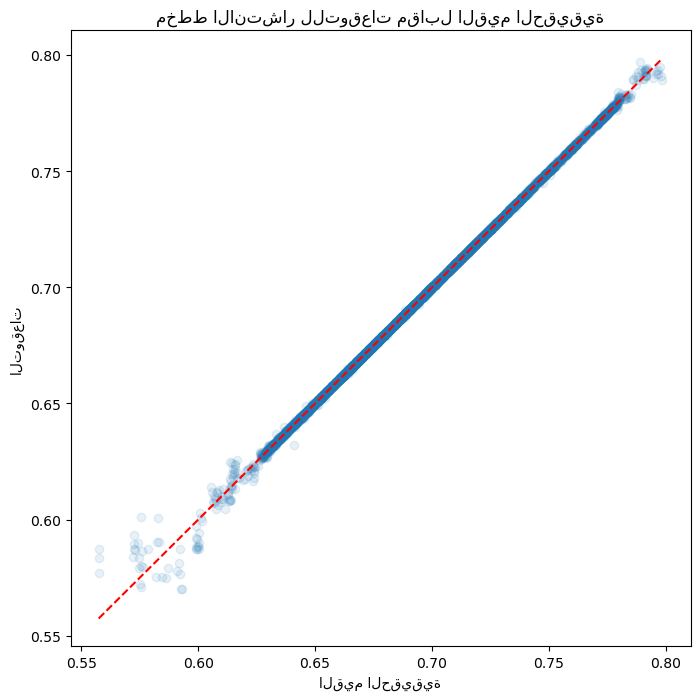

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel('القيم الحقيقية')
plt.ylabel('التوقعات')
plt.title('مخطط الانتشار للتوقعات مقابل القيم الحقيقية')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط الهوية
plt.show()

          Actual  Predicted
141290   0.69177   0.691780
1529620  0.66919   0.669200
339078   0.68280   0.682740
1250705  0.69253   0.692648
1520951  0.66837   0.668348
1379489  0.68371   0.683660
1783244  0.65861   0.658543
1677257  0.63993   0.640020
3250     0.70221   0.702163
1634982  0.64359   0.643546


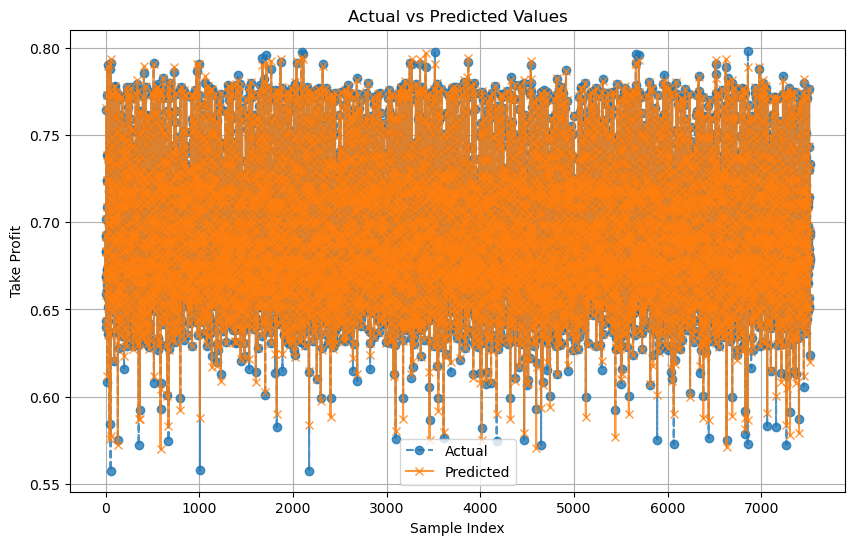

In [17]:
# إنشاء DataFrame للمقارنة بين القيم الحقيقية والقيم المتوقعة
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# عرض أول 10 قيم للمقارنة
print(comparison_df.head(10))

# رسم القيم الحقيقية مقابل القيم المتوقعة
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values, label='Actual', marker='o', linestyle='--', alpha=0.8)
plt.plot(comparison_df['Predicted'].values, label='Predicted', marker='x', linestyle='-', alpha=0.8)
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Take Profit')
plt.grid()
plt.show()


In [18]:
# حفظ النموذج إلى ملف
model.save_model(r'C:\Users\Access\Downloads\AUDUSD-2019\lightgbm_model_reg_audusd.txt')  # حفظ النموذج في ملف نصي

In [4]:
import pandas as pd
import lightgbm as lgb

# تحميل النموذجين من الملفات النصية
price_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_reg.txt')  # نموذج التوقع السعري
classification_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_cls.txt')  # نموذج التصنيف

# قراءة البيانات
data = pd.read_csv(r"C:\Users\Access\Downloads\XAUUSD-2015\XAUUSD_Candlestick_1_M_BID_2015-1-1_2019-12-31.csv")

# حذف الأعمدة غير الضرورية
data = data.drop(columns=['Gmt time', 'Signal', 'Take Profit', 'Stop Loss', 'Result'])

# دالة توقع السعر المستهدف
def predict_target_price(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    predicted_target = price_model.predict(features)[0]  # الحصول على التوقع من نموذج السعر
    return predicted_target

# دالة تصنيف نوع الصفقة
def classify_trade_type(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    trade_type = classification_model.predict(features).argmax(axis=1)[0]  # تصنيف نوع الصفقة
    return trade_type  # مثال: 0 = بدون صفقة، 1 = شراء، -1 = بيع

# إعداد النتائج
results = {
    'Reached_Target': 0,
    'Reached_Stop_Loss': 0
}

# تنفيذ الاختبار لكل صف في البيانات
for index, row in data.iterrows():
    current_price = row['Close']
    
    # تحديد نوع الصفقة بناءً على نموذج التصنيف
    trade_type = classify_trade_type(row)
    
    # متابعة فقط إذا كانت الصفقة إما شراء أو بيع
    if trade_type == 0:  # تخطي في حال عدم وجود صفقة
        continue
    
    # توقع السعر المستهدف بناءً على نموذج التوقع السعري
    target_price = predict_target_price(row)
    point_difference = abs(target_price - current_price)  # حساب الفارق بين السعر الحالي وسعر الهدف
    
    # تعيين وقف الخسارة بناءً على نفس الفارق
    stop_loss_price = current_price - point_difference if trade_type == 2 else current_price + point_difference

    # تحقق إذا كانت البيانات وصلت للهدف أو لوقف الخسارة
    if (trade_type == 2 and row['High'] >= target_price) or (trade_type == 1 and row['Low'] <= target_price):
        results['Reached_Target'] += 1  # تحقق الهدف
    elif (trade_type == 2 and row['Low'] <= stop_loss_price) or (trade_type == 1 and row['High'] >= stop_loss_price):
        results['Reached_Stop_Loss'] += 1  # تحقق وقف الخسارة

# عرض النتائج
print("نتائج اختبار الأداء:")
print("عدد المرات التي وصل فيها السعر للهدف:", results['Reached_Target'])
print("عدد المرات التي وصل فيها السعر لوقف الخسارة:", results['Reached_Stop_Loss'])


KeyError: "['Signal', 'Take Profit', 'Stop Loss', 'Result'] not found in axis"

In [24]:
import pandas as pd
import lightgbm as lgb

# تحميل النموذجين من الملفات النصية
price_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_reg.txt')  # نموذج التوقع السعري
classification_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_cls.txt')  # نموذج التصنيف

# قراءة البيانات
data = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv", nrows=10000)

# حذف الأعمدة غير الضرورية
data = data.drop(columns=['Gmt time', 'Signal', 'Take Profit', 'Stop Loss', 'Result'])

# دالة توقع السعر المستهدف
def predict_target_price(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    predicted_target = price_model.predict(features)[0]
    return predicted_target

# دالة لتصنيف الصفقة
def classify_trade_outcome(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    outcome = classification_model.predict(features).argmax(axis=1)[0]  # 0 = لا صفقة، 1 = خاسرة، 2 = ناجحة
    return outcome

# إعداد النتائج
results = {
    'Reached_Target': 0,
    'Reached_Stop_Loss': 0
}

# حالة الصفقة
trade_open = False
target_price = None
stop_loss_price = None
trade_type = None

# تنفيذ الاختبار لكل صف في البيانات
for index, row in data.iterrows():
    current_price = row['Open']
    
    # إذا لم تكن هناك صفقة مفتوحة
    if not trade_open:
        # تصنيف النتيجة
        outcome = classify_trade_outcome(row)
        
        # متابعة فقط إذا كانت الصفقة ناجحة (2)
        if outcome != 2:
            continue
        
        # توقع السعر المستهدف بناءً على نموذج التوقع السعري
        target_price = predict_target_price(row)
        point_difference = abs(target_price - current_price)  # حساب الفارق بين السعر الحالي وسعر الهدف
        
        # تحديد نوع الصفقة بناءً على الهدف المتوقع
        if target_price > current_price:
            trade_type = 2  # شراء
            stop_loss_price = current_price - point_difference
        else:
            trade_type = 1  # بيع
            stop_loss_price = current_price + point_difference
        
        # تعيين حالة الصفقة كأنها مفتوحة
        trade_open = True
    else:
        # متابعة الصفقة المفتوحة
        for future_index, future_row in data[index+1:].iterrows():
            if (trade_type == 2 and future_row['High'] >= target_price) or (trade_type == 1 and future_row['Low'] <= target_price):
                results['Reached_Target'] += 1
                trade_open = False  # إغلاق الصفقة
                break
            elif (trade_type == 2 and future_row['Low'] <= stop_loss_price) or (trade_type == 1 and future_row['High'] >= stop_loss_price):
                results['Reached_Stop_Loss'] += 1
                trade_open = False  # إغلاق الصفقة
                break

# عرض النتائج
print("نتائج اختبار الأداء:")
print("عدد المرات التي وصل فيها السعر للهدف:", results['Reached_Target'])
print("عدد المرات التي وصل فيها السعر لوقف الخسارة:", results['Reached_Stop_Loss'])


نتائج اختبار الأداء:
عدد المرات التي وصل فيها السعر للهدف: 148
عدد المرات التي وصل فيها السعر لوقف الخسارة: 10


In [22]:
data = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv")
data


,Gmt time,Open,High,Low,Close,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result
0,2024-04-01 01:41:00,1.07907,1.07915,1.07907,1.07912,1.079403,1.079246,1.079149,1.079111,1.079081,47.936751,0.000079,0.000089,0,0.0,0.0,NONE
1,2024-04-01 01:42:00,1.07912,1.07912,1.07904,1.07908,1.079397,1.079239,1.079143,1.079107,1.079080,44.309577,0.000080,0.000089,0,0.0,0.0,NONE
2,2024-04-01 01:43:00,1.07908,1.07911,1.07903,1.07903,1.079389,1.079231,1.079132,1.079096,1.079068,40.095848,0.000080,0.000088,0,0.0,0.0,NONE
3,2024-04-01 01:44:00,1.07905,1.07906,1.07903,1.07903,1.079382,1.079223,1.079123,1.079086,1.079058,40.095848,0.000075,0.000086,0,0.0,0.0,NONE
4,2024-04-01 01:45:00,1.07901,1.07901,1.07890,1.07890,1.079373,1.079210,1.079103,1.079060,1.079019,30.718874,0.000080,0.000088,0,0.0,0.0,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181178,2024-09-27 20:55:00,1.11591,1.11628,1.11589,1.11627,1.116376,1.116321,1.116190,1.116116,1.116064,56.965559,0.000108,0.000079,0,0.0,0.0,NONE
181179,2024-09-27 20:56:00,1.11627,1.11664,1.11625,1.11626,1.116374,1.116319,1.116196,1.116137,1.116113,56.155211,0.000136,0.000090,0,0.0,0.0,NONE
181180,2024-09-27 20:57:00,1.11626,1.11639,1.11589,1.11629,1.116372,1.116318,1.116205,1.116159,1.116157,58.140099,0.000172,0.000103,0,0.0,0.0,NONE
181181,2024-09-27 20:58:00,1.11629,1.11649,1.11629,1.11630,1.116371,1.116317,1.116213,1.116179,1.116193,58.830388,0.000175,0.000107,0,0.0,0.0,NONE


In [1]:
import pandas as pd
import lightgbm as lgb

# تحميل النموذجين من الملفات النصية
price_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_reg.txt')  # نموذج التوقع السعري
classification_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_cls.txt')  # نموذج التصنيف

# قراءة البيانات
data = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv")

# حذف الأعمدة غير الضرورية
data = data.drop(columns=['Gmt time', 'Signal', 'Take Profit', 'Stop Loss', 'Result'])

# إعداد الرصيد والبروتوكول
initial_balance = 50.0
balance = initial_balance
lot_size = 0.20
commission = 1.40
highest_balance = initial_balance
lowest_balance = initial_balance
trade_history = []  # قائمة لتسجيل تفاصيل الصفقات

# دالة توقع السعر المستهدف
def predict_target_price(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    predicted_target = price_model.predict(features)[0]
    return predicted_target

# دالة لتصنيف الصفقة
def classify_trade_outcome(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    outcome = classification_model.predict(features).argmax(axis=1)[0]  # 0 = لا صفقة، 1 = خاسرة، 2 = ناجحة
    return outcome

# دالة لحساب الربح/الخسارة بناءً على النقاط
def calculate_pnl(trade_type, entry_price, exit_price, lot_size):
    points = (exit_price - entry_price) if trade_type == 2 else (entry_price - exit_price)  # 2 = شراء، 1 = بيع
    return points * lot_size * 10  # قيمة النقطة الواحدة للوت 0.10


# إعداد النتائج
results = {
    'Reached_Target': 0,
    'Reached_Stop_Loss': 0
}

# تنفيذ الاختبار لكل صف في البيانات
for index, row in data.iterrows():
    current_price = row['Open']
    
    # إذا لم تكن هناك صفقة مفتوحة
    outcome = classify_trade_outcome(row)
    if outcome != 2:  # فتح صفقة فقط إذا كان التوقع رابحًا
        continue

    # توقع الهدف ووقف الخسارة
    target_price = predict_target_price(row)
    point_difference = abs(target_price - current_price)

    if target_price > current_price:
        trade_type = 2  # شراء
        stop_loss_price = current_price - point_difference
    else:
        trade_type = 1  # بيع
        stop_loss_price = current_price + point_difference

    # متابعة السعر حتى تحقيق الهدف أو وقف الخسارة
    for future_index, future_row in data[index+1:].iterrows():
        if (trade_type == 2 and future_row['High'] >= target_price) or (trade_type == 1 and future_row['Low'] <= target_price):
            pnl = calculate_pnl(trade_type, current_price, target_price, lot_size) - commission
            balance += pnl
            results['Reached_Target'] += 1
            trade_history.append({
                'Trade_Type': 'Buy' if trade_type == 2 else 'Sell',
                'Entry_Price': current_price,
                'Exit_Price': target_price,
                'P&L': pnl,
                'Balance': balance
            })
            break
        elif (trade_type == 2 and future_row['Low'] <= stop_loss_price) or (trade_type == 1 and future_row['High'] >= stop_loss_price):
            pnl = calculate_pnl(trade_type, current_price, stop_loss_price, lot_size) - commission
            balance += pnl
            results['Reached_Stop_Loss'] += 1
            trade_history.append({
                'Trade_Type': 'Buy' if trade_type == 2 else 'Sell',
                'Entry_Price': current_price,
                'Exit_Price': stop_loss_price,
                'P&L': pnl,
                'Balance': balance
            })
            break

    # تحديث أعلى وأدنى الرصيد
    highest_balance = max(highest_balance, balance)
    lowest_balance = min(lowest_balance, balance)

# إنشاء DataFrame لتاريخ الصفقات
trade_df = pd.DataFrame(trade_history)

# حساب الإحصائيات
winning_trades = len(trade_df[trade_df['P&L'] > 0])
total_trades = len(trade_df)
win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
drawdown = highest_balance - lowest_balance

# عرض النتائج
print("نتائج اختبار الأداء:")
print("عدد المرات التي وصل فيها السعر للهدف:", results['Reached_Target'])
print("عدد المرات التي وصل فيها السعر لوقف الخسارة:", results['Reached_Stop_Loss'])
print("الرصيد النهائي:", balance)
print("أعلى رصيد:", highest_balance)
print("أدنى رصيد:", lowest_balance)
print("الدرو داون:", drawdown)

print("نسبة الصفقات الرابحة:", f"{win_rate:.2f}%")

# حفظ تاريخ الصفقات إلى ملف CSV
trade_df.to_csv(r"C:\Users\Access\Downloads\trade_history__.csv", index=False)


نتائج اختبار الأداء:
عدد المرات التي وصل فيها السعر للهدف: 3127
عدد المرات التي وصل فيها السعر لوقف الخسارة: 115
الرصيد النهائي: -4486.401368247003
أعلى رصيد: 50.0
أدنى رصيد: -4486.401368247003
الدرو داون: 4536.401368247003
نسبة الصفقات الرابحة: 0.00%


In [2]:
import pandas as pd
import lightgbm as lgb

# تحميل النموذجين من الملفات النصية
price_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_reg.txt')  # نموذج التوقع السعري
classification_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_cls.txt')  # نموذج التصنيف

# قراءة البيانات
data = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv")

# حذف الأعمدة غير الضرورية
data = data.drop(columns=['Gmt time', 'Signal', 'Take Profit', 'Stop Loss', 'Result'])

# إعدادات الرصيد واللوت والعمولة
initial_balance = 50.0
balance = initial_balance
lot_size = 0.20
commission = 1.40

# بيانات للتقرير النهائي
trade_results = []
max_balance = balance
min_balance = balance

# دالة توقع السعر المستهدف
def predict_target_price(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    predicted_target = price_model.predict(features)[0]
    return predicted_target

# دالة لتصنيف الصفقة
def classify_trade_outcome(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    outcome = classification_model.predict(features).argmax(axis=1)[0]  # 0 = لا صفقة، 1 = خاسرة، 2 = ناجحة
    return outcome

# دالة لحساب الربح أو الخسارة للنقاط
def calculate_pnl(trade_type, entry_price, exit_price, lot_size):
    if trade_type == 2:  # شراء
        points = exit_price - entry_price
    else:  # بيع
        points = entry_price - exit_price

    pnl = points * lot_size * 10  # معامل لتحديد قيمة النقطة
    return pnl

# تنفيذ الاختبار لكل صف في البيانات
for index, row in data.iterrows():
    current_price = row['Open']
    
    # تصنيف النتيجة
    outcome = classify_trade_outcome(row)
    
    # متابعة فقط إذا كانت الصفقة ناجحة (2)
    if outcome != 2:
        continue
    
    # توقع السعر المستهدف بناءً على نموذج التوقع السعري
    target_price = predict_target_price(row)
    entry_price = current_price
    point_difference = abs(target_price - entry_price)  # حساب الفارق بين السعر الحالي وسعر الهدف
    
    # تحديد نوع الصفقة بناءً على الهدف المتوقع
    if target_price > entry_price:
        trade_type = 2  # شراء
        stop_loss_price = entry_price - point_difference
    else:
        trade_type = 1  # بيع
        stop_loss_price = entry_price + point_difference

    # البحث في الصفوف التالية عن تحقيق الهدف أو وقف الخسارة
    for next_index, next_row in data[index+1:].iterrows():
        exit_price = next_row['Open']
        
        if (trade_type == 2 and exit_price >= target_price) or (trade_type == 1 and exit_price <= target_price):
            # وصل للهدف
            pnl = calculate_pnl(trade_type, entry_price, exit_price, lot_size) - commission
            balance += pnl
            trade_results.append({
                "Trade_Type": "Buy" if trade_type == 2 else "Sell",
                "Entry_Price": entry_price,
                "Exit_Price": exit_price,
                "P&L": pnl,
                "Balance": balance
            })
            break
        elif (trade_type == 2 and exit_price <= stop_loss_price) or (trade_type == 1 and exit_price >= stop_loss_price):
            # وصل لوقف الخسارة
            pnl = calculate_pnl(trade_type, entry_price, exit_price, lot_size) - commission
            balance += pnl
            trade_results.append({
                "Trade_Type": "Buy" if trade_type == 2 else "Sell",
                "Entry_Price": entry_price,
                "Exit_Price": exit_price,
                "P&L": pnl,
                "Balance": balance
            })
            break

    # تحديث أعلى وأدنى رصيد
    max_balance = max(max_balance, balance)
    min_balance = min(min_balance, balance)

# تحليل الأداء النهائي
total_trades = len(trade_results)
winning_trades = len([t for t in trade_results if t['P&L'] > 0])
win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
drawdown = max_balance - min_balance

# عرض النتائج
print("نتائج اختبار الأداء:")
print("عدد الصفقات:", total_trades)
print("نسبة الصفقات الرابحة:", win_rate, "%")
print("الرصيد النهائي:", balance)
print("أعلى رصيد:", max_balance)
print("أدنى رصيد:", min_balance)
print("الدرو داون:", drawdown)

# حفظ النتائج في ملف CSV
trade_results_df = pd.DataFrame(trade_results)
trade_results_df.to_csv("trade_results.csv", index=False)


نتائج اختبار الأداء:
عدد الصفقات: 3242
نسبة الصفقات الرابحة: 0.0 %
الرصيد النهائي: -4486.211719999964
أعلى رصيد: 50.0
أدنى رصيد: -4486.211719999964
الدرو داون: 4536.211719999964


In [3]:
trade_results_df

,Trade_Type,Entry_Price,Exit_Price,P&L,Balance
0,Buy,1.07865,1.07906,-1.39918,48.60082
1,Buy,1.07869,1.07913,-1.39912,47.20170
2,Sell,1.07885,1.07842,-1.39914,45.80256
3,Buy,1.07866,1.07906,-1.39920,44.40336
4,Buy,1.07850,1.07892,-1.39916,43.00420
...,...,...,...,...,...
3237,Buy,1.11834,1.11848,-1.39972,-4480.60974
3238,Sell,1.11516,1.11560,-1.40088,-4482.01062
3239,Sell,1.11619,1.11659,-1.40080,-4483.41142
3240,Buy,1.11632,1.11662,-1.39940,-4484.81082


In [4]:
import pandas as pd
import lightgbm as lgb

# تحميل النموذجين من الملفات النصية
price_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_reg.txt')  # نموذج التوقع السعري
classification_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_cls.txt')  # نموذج التصنيف

# قراءة البيانات
data = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv")

# حذف الأعمدة غير الضرورية
data = data.drop(columns=['Gmt time', 'Signal', 'Take Profit', 'Stop Loss', 'Result'])

# إعدادات الرصيد واللوت والعمولة
initial_balance = 50.0
balance = initial_balance
lot_size = 0.20
commission = 1.40

# بيانات للتقرير النهائي
trade_results = []
max_balance = balance
min_balance = balance

# دالة توقع السعر المستهدف
def predict_target_price(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    predicted_target = price_model.predict(features)[0]
    return predicted_target

# دالة لتصنيف الصفقة
def classify_trade_outcome(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    outcome = classification_model.predict(features).argmax(axis=1)[0]  # 0 = لا صفقة، 1 = خاسرة، 2 = ناجحة
    return outcome

# دالة لحساب الربح أو الخسارة للنقاط
def calculate_pnl(trade_type, entry_price, exit_price, lot_size):
    points = (exit_price - entry_price) * 10000  # حساب النقاط (1 نقطة = 0.0001)
    if trade_type == "Buy":
        pnl = points * lot_size - commission
    else:  # Sell
        pnl = -points * lot_size - commission
    return pnl

# تنفيذ الاختبار لكل صف في البيانات
for index, row in data.iterrows():
    current_price = row['Open']
    
    # تصنيف النتيجة
    outcome = classify_trade_outcome(row)
    
    # متابعة فقط إذا كانت الصفقة ناجحة (2)
    if outcome != 2:
        continue
    
    # توقع السعر المستهدف بناءً على نموذج التوقع السعري
    target_price = predict_target_price(row)
    entry_price = current_price
    point_difference = abs(target_price - entry_price)  # حساب الفارق بين السعر الحالي وسعر الهدف
    
    # تحديد نوع الصفقة بناءً على الهدف المتوقع
    if target_price > entry_price:
        trade_type = "Buy"
        stop_loss_price = entry_price - point_difference
    else:
        trade_type = "Sell"
        stop_loss_price = entry_price + point_difference

    # البحث في الصفوف التالية عن تحقيق الهدف أو وقف الخسارة
    for next_index, next_row in data[index+1:].iterrows():
        exit_price = next_row['Open']
        
        if (trade_type == "Buy" and exit_price >= target_price) or (trade_type == "Sell" and exit_price <= target_price):
            # وصل للهدف
            pnl = calculate_pnl(trade_type, entry_price, exit_price, lot_size)
            balance += pnl
            trade_results.append({
                "Trade_Type": trade_type,
                "Entry_Price": entry_price,
                "Exit_Price": exit_price,
                "P&L": pnl,
                "Balance": balance
            })
            break
        elif (trade_type == "Buy" and exit_price <= stop_loss_price) or (trade_type == "Sell" and exit_price >= stop_loss_price):
            # وصل لوقف الخسارة
            pnl = calculate_pnl(trade_type, entry_price, exit_price, lot_size)
            balance += pnl
            trade_results.append({
                "Trade_Type": trade_type,
                "Entry_Price": entry_price,
                "Exit_Price": exit_price,
                "P&L": pnl,
                "Balance": balance
            })
            break

    # تحديث أعلى وأدنى رصيد
    max_balance = max(max_balance, balance)
    min_balance = min(min_balance, balance)

# تحليل الأداء النهائي
total_trades = len(trade_results)
winning_trades = len([t for t in trade_results if t['P&L'] > 0])
win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
drawdown = max_balance - min_balance

# عرض النتائج
print("نتائج اختبار الأداء:")
print("عدد الصفقات:", total_trades)
print("نسبة الصفقات الرابحة:", win_rate, "%")
print("الرصيد النهائي:", balance)
print("أعلى رصيد:", max_balance)
print("أدنى رصيد:", min_balance)
print("الدرو داون:", drawdown)

# حفظ النتائج في ملف CSV
trade_results_df = pd.DataFrame(trade_results)
trade_results_df.to_csv("trade_results.csv", index=False)


نتائج اختبار الأداء:
عدد الصفقات: 3242
نسبة الصفقات الرابحة: 3.115360888340531 %
الرصيد النهائي: -1900.519999999988
أعلى رصيد: 50.0
أدنى رصيد: -1900.519999999988
الدرو داون: 1950.519999999988


In [5]:
trade_results_df

,Trade_Type,Entry_Price,Exit_Price,P&L,Balance
0,Buy,1.07865,1.07906,-0.58,49.42
1,Buy,1.07869,1.07913,-0.52,48.90
2,Sell,1.07885,1.07842,-0.54,48.36
3,Buy,1.07866,1.07906,-0.60,47.76
4,Buy,1.07850,1.07892,-0.56,47.20
...,...,...,...,...,...
3237,Buy,1.11834,1.11848,-1.12,-1892.94
3238,Sell,1.11516,1.11560,-2.28,-1895.22
3239,Sell,1.11619,1.11659,-2.20,-1897.42
3240,Buy,1.11632,1.11662,-0.80,-1898.22


In [ ]:
# استيراد المكتبات اللازمة
import pandas as pd
import lightgbm as lgb
import MetaTrader5 as mt5
import pandas_ta as ta
import numpy as np
import pyfiglet as pf
from datetime import datetime, timedelta
import time
import os
import sys
import colorama
from colorama import Fore, Back, Style
from termcolor import colored
import telebot
import io

# إعداد الترميز الافتراضي إلى UTF-8
#sys.stdout = io.TextIOWrapper(sys.stdout.buffer, encoding='utf-8')

# تفعيل colorama للعمل على أنظمة Windows
colorama.init()

# دالة لتحويل وقت Unix إلى وقت مقروء
def unix_to_datetime(unix_time):
    return datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d %H:%M:%S')

# دالة لمسح الشاشة باستخدام sys.stdout.write
def clear_screen():
    sys.stdout.write("\033[H\033[J")  # مسح الشاشة باستخدام ANSI

# دالة لحساب الربح الصافي للصفقات المفتوحة
def calculate_open_net_profit(positions):
    open_net_profit = 0.0
    for position in positions:
        profit = position.profit
        swap = position.swap if hasattr(position, 'swap') else 0.0
        commission = position.commission if hasattr(position, 'commission') else 0.0
        open_net_profit += profit - swap - commission
    return open_net_profit

# دالة لمراقبة الصفقات المفتوحة وفتح صفقات جديدة عند عدم وجود صفقات
def monitor_trades(max_trades):
    while True:
        # تحقق من الاتصال وأعد المحاولة إذا لزم الأمر
        if not mt5.initialize():
            print(Back.RED + "[!] Lost connection to MT5, attempting to reconnect..." + Back.RESET)
            connect_to_mt5()
            continue

        clear_screen()  # مسح الشاشة قبل الطباعة الجديدة

        positions = mt5.positions_get()
        num_open_trades = len(positions)

        if num_open_trades > 0:
            # حساب الربح الصافي باستخدام دالة calculate_open_net_profit
            open_net_profit = calculate_open_net_profit(positions)
            print(textArt)
            print("\n# Open Positions ")
            print("-" * 49)

            # التأكد من الرمز والحصول على أسعار العرض والطلب
            symbol = positions[0].symbol  # استخدام رمز الصفقة الأولى للحصول على بيانات
            tick_ = mt5.symbol_info_tick(symbol)
            if tick_:
                print(f"| Ask: {tick_.ask:.5f} | Bid: {tick_.bid:.5f} | Spread: {tick_.ask - tick_.bid:.5f} |")

            print("-" * 112)
            print(f"| {'Symbol':<6} | {'Ticket':<10} | {'Vol':<5} | {'Type':<5} | {'Open Price':<10} | "
                  f"{'Stop Loss':<11} | {'Take Profit':<11} | {'Profit':<6} |  "
                  f"{'Open Time':<20}|")
            print("-" * 112)

            for position in positions:
                print(f"| {position.symbol:<6} | {position.ticket:<10} | {position.volume:<5} | "
                      f"{'Buy' if position.type == 0 else 'Sell':<5} | {position.price_open:<10.5f} | "
                      f"{position.sl:<11.5f} | {position.tp:<11.5f} | {position.profit:<6} | "
                      f"{unix_to_datetime(position.time):<20} |")
            print("-" * 112)

            # الحصول على معلومات الحساب وعرضها فقط عند وجود صفقات مفتوحة
            account_info = mt5.account_info()
            if account_info is not None:
                margin_level = (account_info.equity / account_info.margin) * 100 if account_info.margin != 0 else 0
                print(Back.RED + f"| Balance: {account_info.balance:.2f}$ | Equity: {account_info.equity:.2f}$ | "
                      f"Margin: {account_info.margin:.2f}$ | Free Margin: {account_info.margin_free:.2f}$ | "
                      f"Margin Level: {margin_level:.2f}% | Profit: {open_net_profit:.2f}$ |" + Back.RESET)
                print('-'*112)
            else:
                print(Back.RED +"[!] Failed to retrieve account info."+ Back.RESET)

        if num_open_trades < max_trades:
            # محاولة فتح صفقة جديدة عند عدم تجاوز الحد الأقصى للصفقات المفتوحة
            open_new_trade()

        # الانتظار لعدد معين من الثواني قبل التحديث
        time.sleep(1)

# دالة لفتح صفقة جديدة
def open_new_trade():
    
    # جلب آخر 100 شمعة دقيقة
    symbol = "EURUSD"  # يمكنك تغيير الزوج حسب ما تريد
    timeframe = mt5.TIMEFRAME_M1  # الإطار الزمني هو الدقيقة
    num_candles = 100  # عدد الشموع

    # جلب الشموع
    rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, num_candles)

    # إغلاق MetaTrader5
    mt5.shutdown()

    # تحويل البيانات إلى DataFrame لسهولة المعالجة
    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')  # تحويل الطابع الزمني إلى وقت قابل للقراءة

    # تحويل البيانات إلى DataFrame
    df = pd.DataFrame(ticks, columns=['time', 'bid', 'ask', 'last', 'volume', 'time_msc', 'flags', 'volume_real'])

    # تحويل التوقيت من Unix إلى datetime
    df['time'] = pd.to_datetime(df['time'], unit='s')

    # احتفظ فقط بآخر 300 تكة
    df = df.tail(100).reset_index(drop=True)

    # اختيار الأعمدة المطلوبة فقط: Open, High, Low, Close
    df = df[['time', 'open', 'high', 'low', 'close']]

    # تحويل البيانات إلى DataFrame
    if df is None or len(df) == 0:
        print(Back.RED +"[!] no data from mt5."+ Back.RESET)
        return
    
    rates_df = pd.DataFrame(df)

    # حساب المؤشرات الفنية باستخدام pandas-ta
    rates_df['EMA_100'] = ta.ema(rates_df['close'], length=100)
    rates_df['EMA_50'] = ta.ema(rates_df['close'], length=50)
    rates_df['EMA_21'] = ta.ema(rates_df['close'], length=21)
    rates_df['EMA_13'] = ta.ema(rates_df['close'], length=13)
    rates_df['EMA_7'] = ta.ema(rates_df['close'], length=7)
    rates_df['RSI_10'] = ta.rsi(rates_df['close'], length=10)
    rates_df['ATR_10'] = ta.atr(rates_df['high'], rates_df['low'], rates_df['close'], length=10)
    rates_df['ATR_30'] = ta.atr(rates_df['high'], rates_df['low'], rates_df['close'], length=30)

    # التأكد من عدم وجود قيم مفقودة وملءها إذا لزم الأمر
    rates_df.fillna(method='ffill', inplace=True)

    # تحويل الأعمدة إلى النوع float
    rates_df = rates_df.astype(float)

    # اختيار آخر صف للمدخلات
    input_data = rates_df.iloc[-1][['open', 'high', 'low', 'close',
                                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                                    'RSI_10', 'ATR_10', 'ATR_30']]

    # تحويل المدخلات إلى DataFrame
    input_df = pd.DataFrame([input_data])

    # التأكد من ترتيب الأعمدة كما في التدريب
    features = ['open', 'high', 'low', 'close',
                'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                'RSI_10', 'ATR_10', 'ATR_30']

    # ترتيب الأعمدة كما في التدريب
    input_df = input_df[features]

    # التنبؤ باستخدام النموذج
    prediction_ = model_r.predict(input_df)

    # استخراج القيمة من المصفوفة إذا كانت تحتوي على عنصر واحد
    prediction_value = prediction_[0]

    # تنسيق الرقم إلى 5 خانات عشرية
    formatted_prediction = "{:.5f}".format(prediction_value)
    print(textArt)
    print(f'# Prediction: {formatted_prediction}')
    
    # إعداد معلومات الصفقة
    lot_size = 0.1  # حجم العقد
    X = float(formatted_prediction)  # مستوى السعر الذي ستقارن به

    # الحصول على سعر السوق الحالي
    symbol_info = mt5.symbol_info(symbol)
    if symbol_info is None:
        print(Back.RED +f"[!] Symbol {symbol} is unavailable"+ Back.RESET)
        return

    # التأكد من أن السوق جاهز للتداول
    if not symbol_info.visible:
        print(f"الرمز {symbol} غير مرئي، سيتم فتحه...")
        mt5.symbol_select(symbol, True)

    # الحصول على أسعار السوق الحالية
    tick_info = mt5.symbol_info_tick(symbol)
    if tick_info is None:
        print(Back.RED +f"[!] Failed to get prices for [{symbol}] symbol."+ Back.RESET)
        return

    ask_price = tick_info.ask  # سعر الشراء
    bid_price = tick_info.bid  # سعر البيع

    # تحديد نوع الصفقة بناءً على الشروط
    if ask_price < X:
        order_type = mt5.ORDER_TYPE_BUY
        order_price = ask_price
        print(f"# Buy order at {order_price:.5f}")
        print(f"# Spread is {ask_price - bid_price:.5f}")

    else:
        order_type = mt5.ORDER_TYPE_SELL
        order_price = bid_price  # سعر البيع
        print(f"# Sell order at {order_price:.5f}")
        print(f"# Spread is {ask_price - bid_price:.5f}")

    # إعداد مستويات وقف الخسارة وهدف الربح بحيث تكون متساوية
    point = mt5.symbol_info(symbol).point
    if order_type == mt5.ORDER_TYPE_BUY:
        POINT_FORM_TARGET = X - order_price 
        sl = order_price - (POINT_FORM_TARGET)   # وقف الخسارة
        tp = X      # هدف الربح
    else:
        POINT_FORM_TARGET = order_price - X
        sl = order_price + (POINT_FORM_TARGET)   # وقف الخسارة
        tp = X       # هدف الربح
    
    # تحقق من أن هدف الربح أكبر من أو يساوي 40 نقطة
    if order_type == mt5.ORDER_TYPE_BUY:
        if 0.00060 <= abs(X - order_price) <= 0.00040:
            print(Back.RED +"\n[!] Profit target is less than 4 points, the buy trade will not be opened."+ Back.RESET)
            return
    if order_type == mt5.ORDER_TYPE_SELL:
        if 0.00060 <= abs(order_price - X) <= 0.00040:
            print(Back.RED +"\n[!] Profit target is less than 4 points, the sell trade will not be opened."+ Back.RESET)
            return        

    # تنسيق وقف الخسارة وهدف الربح إلى 5 خانات عشرية
    sl = float("{:.5f}".format(sl))
    tp = float("{:.5f}".format(tp))

    # إعداد الطلب وفتح الصفقة
    order_request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": lot_size,
        "type": order_type,
        "price": order_price,  # تأكد من تحديد السعر الصحيح
        "sl": sl,
        "tp": tp,
        "deviation": 30,
        "magic": 234000,
        "comment": "Python script open",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_IOC,
    }

    # تنفيذ الصفقة
    result = mt5.order_send(order_request)

    # التحقق من نتيجة الطلب
    if result is None:
        print("فشل في إرسال الطلب")
        print(Back.RED +f"[!] last error: {mt5.last_error()}"+ Back.RESET)
        return

    if result.retcode != mt5.TRADE_RETCODE_DONE:
        print(Back.RED +f"[!] can't open order, error is: {result.retcode}"+ Back.RESET)    
        # طباعة معلومات إضافية حول الخطأ
        print(Back.RED +f"[!] more error details: {result}"+ Back.RESET)

    else:
        print("# The order has been opened successfully.")

# دالة لإعادة الاتصال بـ MetaTrader 5
def connect_to_mt5():
    while True:
        if mt5.initialize(login=account_number, password=password, server=server):
            print("[+] Connected to MT5 successfully.")
            break
        else:
            print(Back.RED + "[!] Error connecting to MT5. Retrying in 5 seconds..." + Back.RESET)
            time.sleep(5)

# عرض نص فني
#text = pf.figlet_format("F-14 >>>>>\nPOWER OF AI")
#textArt = colored(text, 'red')
textArt = ("""\n
███████╗     ██╗██╗  ██╗    ██╗ ██╗ ██╗ ██╗ ██╗                                
██╔════╝    ███║██║  ██║    ╚██╗╚██╗╚██╗╚██╗╚██╗                               
█████╗█████╗╚██║███████║     ╚██╗╚██╗╚██╗╚██╗╚██╗                              
██╔══╝╚════╝ ██║╚════██║     ██╔╝██╔╝██╔╝██╔╝██╔╝                              
██║          ██║     ██║    ██╔╝██╔╝██╔╝██╔╝██╔╝                               
╚═╝          ╚═╝     ╚═╝    ╚═╝ ╚═╝ ╚═╝ ╚═╝ ╚═╝                                
                                                                               
██████╗  ██████╗ ██╗    ██╗███████╗██████╗      ██████╗ ███████╗     █████╗ ██╗
██╔══██╗██╔═══██╗██║    ██║██╔════╝██╔══██╗    ██╔═══██╗██╔════╝    ██╔══██╗██║
██████╔╝██║   ██║██║ █╗ ██║█████╗  ██████╔╝    ██║   ██║█████╗      ███████║██║
██╔═══╝ ██║   ██║██║███╗██║██╔══╝  ██╔══██╗    ██║   ██║██╔══╝      ██╔══██║██║
██║     ╚██████╔╝╚███╔███╔╝███████╗██║  ██║    ╚██████╔╝██║         ██║  ██║██║
╚═╝      ╚═════╝  ╚══╝╚══╝ ╚══════╝╚═╝  ╚═╝     ╚═════╝ ╚═╝         ╚═╝  ╚═╝╚═╝
                                                                               
           """)
print(textArt)

# تحميل النموذج المدرب
model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_reg.txt')

# معلومات تسجيل الدخول
account_number = 51915724  # رقم الحساب
password = "yqWAA@pt37$V1W"  # كلمة المرور
server = "ICMarketsSC-Demo"  # اسم الخادم

# معلومات تسجيل الدخول
#account_number = 446027  # رقم الحساب
#password = "BBkj_70173710$$"  # كلمة المرور
#server = "BlackBullMarkets-Live"  # اسم الخادم

# تهيئة الاتصال بـ MetaTrader 5
connect_to_mt5()

# تحديد الرمز الزمني والفترة الزمنية
symbol = "EURUSD"  # على سبيل المثال

# تحديد الحد الأقصى للصفقات المفتوحة
max_trades = 1  # يمكنك تغيير هذا الرقم لتحديد العدد المسموح به من الصفقات المفتوحة في نفس الوقت

# بدء مراقبة الصفقات
monitor_trades(max_trades)

#---------------------------------------------------------------#
#                          bot                                  #
#---------------------------------------------------------------#


# Telegram settings
TELEGRAM_TOKEN = '7585891124:AAFGn0El-AGhhZLQZP21VLmuf4r29BedqqA'
CHAT_ID = '560585985'
bot = telebot.TeleBot(TELEGRAM_TOKEN)

# Track the deals already sent
sent_deal_tickets = set()

def send_trade_info(deal, trade_number, price_open):
    try:
        net_profit = deal.profit - deal.commission
        pip_size = 0.0001 if "JPY" not in deal.symbol else 0.01
        pips = abs(deal.price - price_open) / pip_size
        message = (
            f"Closed Trade Today #{trade_number}🚀 :\n\n"
            f"Ticket Number: {deal.ticket}\n"
            f"Symbol: {deal.symbol}\n"
            f"Volume: {deal.volume}\n"
            f"Open Price: {price_open:.5f}\n"
            f"Close Price: {deal.price:.5f}\n"
            f"Pips: {pips:.1f} ☣️\n"
            f"Gross Profit/Loss: {deal.profit:.2f} \n"
            f"Commission: {deal.commission:.2f}\n\n"
            f"Net Profit/Loss: {net_profit:.2f} 🤑\n"
        )
        bot.send_message(CHAT_ID, message)
    except Exception as e:
        print(f"Error sending message: {e}")

def check_new_closed_trades():
    end_time = datetime.now()
    start_time = end_time - timedelta(minutes=1)

    try:
        orders = mt5.history_orders_get(start_time, end_time)
        deals = mt5.history_deals_get(start_time, end_time)

        if deals is None or len(deals) == 0:
            print("No new closed trades found.")
            return

        order_open_prices = {order.ticket: order.price_open for order in orders if order.type < 2}
        trade_number = 1

        for deal in deals:
            if deal.entry == mt5.DEAL_ENTRY_OUT and deal.order in order_open_prices:
                if deal.ticket not in sent_deal_tickets:
                    price_open = order_open_prices[deal.order]
                    send_trade_info(deal, trade_number, price_open)
                    sent_deal_tickets.add(deal.ticket)
                    trade_number += 1
    except Exception as e:
        print(f"Error retrieving trades: {e}")

if __name__ == "__main__":
    while not mt5.initialize():
        print("Failed to initialize MetaTrader 5, retrying in 5 seconds")
        time.sleep(5)

    try:
        while True:
            check_new_closed_trades()
            time.sleep(10)
    except KeyboardInterrupt:
        print("Script stopped by user.")
    finally:
        mt5.shutdown()




In [2]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# استبدل مسار ملف البيانات الخاص بك
file_path = r"C:\Users\Access\Downloads\AUDUSD-2019\AUDUSD_Candlestick_1_M_BID_2019-1-1_2024-11-18_ta_15-5.csv"
data = pd.read_csv(file_path)

# تحويل القيم النصية في عمود 'Result' إلى قيم عددية
data['Result'] = data['Result'].map({'WIN': 2, 'LOSS': 1, 'NONE': 0})

# فصل الميزات (X) والهدف (y)
X = data.drop(columns=['Result'])  # حذف عمود النتيجة من البيانات
y = data['Result']  # تعيين النتيجة كهدف

# طباعة التوزيع الأصلي للفئات
print("توزيع الفئات قبل المعالجة:", Counter(y))

# تطبيق Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# طباعة التوزيع الجديد للفئات
print("توزيع الفئات بعد المعالجة:", Counter(y_resampled))

# دمج البيانات المُعاد توازنها في DataFrame جديد (اختياري)
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Result'])], axis=1)

# حفظ البيانات الجديدة (اختياري)
output_file = r"C:\Users\Access\Downloads\AUDUSD_undersampled.csv"
df_resampled.to_csv(output_file, index=False)

print(f"تم حفظ البيانات المُعاد توازنها في: {output_file}")


توزيع الفئات قبل المعالجة: Counter({0: 2013584, 1: 45562, 2: 18921})
توزيع الفئات بعد المعالجة: Counter({0: 18921, 1: 18921, 2: 18921})
تم حفظ البيانات المُعاد توازنها في: C:\Users\Access\Downloads\AUDUSD_undersampled.csv


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# تحميل البيانات
file_path = r"C:\Users\Access\Downloads\AUDUSD_undersampled.csv"
data = pd.read_csv(file_path)
#data = data[~data['Result'].isin([0])]

# فصل الميزات والهدف
X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]  # الميزات

y = data['Result']  # الهدف

# تحويل الهدف إلى تنسيق فئات (One-Hot Encoding)
y = to_categorical(y, num_classes=3)

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تطبيع البيانات (Normalization) لتحسين أداء النموذج
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# بناء نموذج DNN
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # الطبقة الأولى
    Dropout(0.1),  # لتقليل الإفراط في التعلم (Overfitting)
    Dense(64, activation='relu'),  # الطبقة المخفية
    #Dropout(0.1),
    Dense(3, activation='softmax')  # الطبقة الأخيرة للإخراج (عدد الفئات = 3)
])

# تجميع النموذج (Compile)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# تدريب النموذج
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10, 
                    batch_size=10, 
                    verbose=1)

# تقييم النموذج
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# توقع القيم وتصنيف التقرير
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred, target_names=['LOSS', 'WIN', 'NONE']))


Epoch 1/10


C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4541/4541 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3995 - loss: 1.0486 - val_accuracy: 0.4164 - val_loss: 1.0152
Epoch 2/10
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.4394 - loss: 1.0074 - val_accuracy: 0.4530 - val_loss: 1.0003
Epoch 3/10
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.4581 - loss: 0.9972 - val_accuracy: 0.4598 - val_loss: 0.9908
Epoch 4/10
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.4601 - loss: 0.9925 - val_accuracy: 0.4616 - val_loss: 0.9884
Epoch 5/10
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.4585 - loss: 0.9930 - val_accuracy: 0.4640 - val_loss: 0.9863
Epoch 6/10
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.4639 - loss: 0.9877 - val_accuracy: 0.4679 - val_loss: 0.9851
Epoch 7/10
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.4600 - loss: 0.9876 - val_accuracy: 0.4653 - val_loss: 0.9882
Epoch 8/10
4541/4541 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.4668 - loss: 0.9857 - val_accurac

In [ ]:
# استيراد المكتبات اللازمة
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LeakyReLU

# 1. تحميل البيانات
# ضع مسار ملف البيانات هنا
data = pd.read_csv(r"C:\Users\Access\Downloads\AUDUSD_undersampled.csv")

# 2. معالجة البيانات
# إعادة تصنيف المشكلة كتصنيف ثنائي: WIN مقابل الباقي
data['Result'] = data['Result'].map({ 2 : 1, 1 : 0 , 0:0 })  # WIN = 1, الآخرين = 0

# فصل الميزات (X) والتصنيفات (y)
X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]  # الميزات
y = data['Result']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. تطبيع البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. إنشاء نموذج الشبكة العصبية
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(256),
    LeakyReLU(alpha=0.1),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dense(1, activation='sigmoid')
])



model.compile(optimizer=Adam(learning_rate=0.05),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# 7. تدريب النموذج
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10, batch_size=10,
)

# 8. تقييم النموذج
# عرض الأداء على بيانات الاختبار
y_pred = (model.predict(X_test) > 0.3).astype(int)

# عرض مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not WIN', 'WIN'], yticklabels=['Not WIN', 'WIN'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# عرض التقرير الكامل للأداء
print(classification_report(y_test, y_pred, target_names=['Not WIN', 'WIN']))

# 9. رسم دقة وفقدان النموذج عبر الدورات
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.title('Model Performance Over Epochs')
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# تحميل البيانات
file_path = r"C:\Users\Access\Downloads\AUDUSD_undersampled.csv"
data = pd.read_csv(file_path)

# فصل الميزات والهدف
X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]  # الميزات
y = data['Result']  # الهدف

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تطبيع الميزات (اختياري، يعتمد على طبيعة الميزات)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# إنشاء نموذج Random Forest
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

# تدريب النموذج
rf_model.fit(X_train, y_train)

# توقع القيم
y_pred = rf_model.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# تقرير الأداء لكل فئة
print(classification_report(y_test, y_pred, target_names=['NONE', 'LOSS', 'WIN']))


Accuracy: 0.4842
              precision    recall  f1-score   support

        NONE       0.62      0.49      0.55      3793
        LOSS       0.43      0.47      0.45      3762
         WIN       0.44      0.49      0.46      3798

    accuracy                           0.48     11353
   macro avg       0.50      0.48      0.49     11353
weighted avg       0.50      0.48      0.49     11353



In [46]:
# ضع مسار ملف البيانات هنا
data = pd.read_csv(r"C:\Users\Access\Downloads\AUDUSD_undersampled.csv")
data

,Gmt time,Open,High,Low,Close,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result
0,2023-06-09 10:24:00,0.67092,0.67092,0.67088,0.67091,0.671114,0.671036,0.670912,0.670902,0.670909,50.359207,0.000090,0.000105,0,0.00000,0.00000,0
1,2023-10-12 19:29:00,0.63145,0.63147,0.63140,0.63146,0.631493,0.631395,0.631405,0.631420,0.631429,55.981288,0.000101,0.000119,0,0.00000,0.00000,0
2,2020-10-06 04:05:00,0.71874,0.71885,0.71874,0.71877,0.719012,0.718994,0.718843,0.718765,0.718729,47.681984,0.000204,0.000217,0,0.00000,0.00000,0
3,2023-11-30 19:26:00,0.66043,0.66047,0.66037,0.66044,0.660931,0.660695,0.660647,0.660633,0.660575,33.566546,0.000116,0.000122,0,0.00000,0.00000,0
4,2024-05-01 12:26:00,0.64883,0.64888,0.64873,0.64886,0.648190,0.648317,0.648484,0.648571,0.648674,72.829734,0.000165,0.000123,0,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56758,2024-11-18 09:57:00,0.64583,0.64583,0.64571,0.64571,0.645881,0.645851,0.645892,0.645884,0.645857,35.750566,0.000134,0.000138,-1,0.64433,0.64633,2
56759,2024-11-18 11:55:00,0.64522,0.64522,0.64506,0.64506,0.645434,0.645257,0.645159,0.645157,0.645156,41.756704,0.000101,0.000111,-1,0.64372,0.64572,2
56760,2024-11-18 11:57:00,0.64521,0.64521,0.64506,0.64508,0.645423,0.645249,0.645157,0.645154,0.645149,44.883570,0.000113,0.000115,-1,0.64371,0.64571,2
56761,2024-11-18 13:00:00,0.64513,0.64518,0.64508,0.64508,0.645407,0.645237,0.645154,0.645150,0.645143,45.014905,0.000109,0.000113,-1,0.64363,0.64563,2


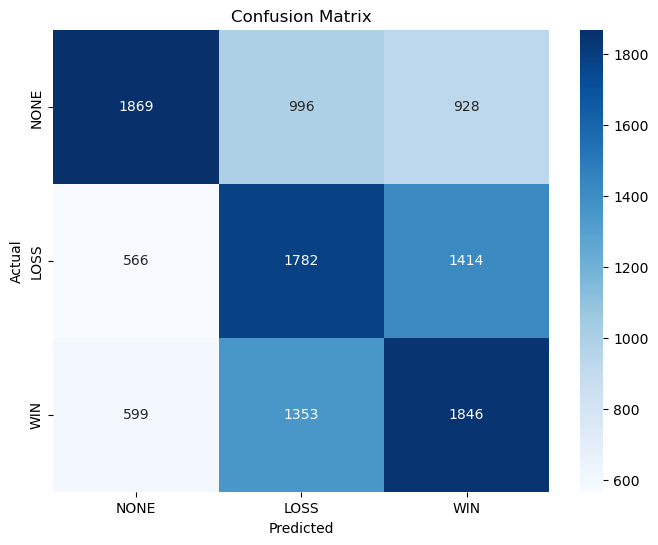

In [12]:

# مصفوفة الالتباس
conf_matrix = confusion_matrix(y_test, y_pred)

# رسم مصفوفة الالتباس
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NONE', 'LOSS', 'WIN'], yticklabels=['NONE', 'LOSS', 'WIN'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [25]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# تحميل البيانات
data = pd.read_csv(r"C:\Users\Access\Downloads\AUDUSD_undersampled.csv")

# تحضير البيانات
#data['Result'] = data['Result'].map({'WIN': 2, 'LOSS': 1, 'NONE': 0})
data = data[~data['Result'].isin([0])]

# تحديد المميزات والهدف
X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]  # الميزات
y = data['Result']  # الفئة المستهدفة (Result)

# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء نموذج LightGBM
lgbm_model = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.15, max_depth=-1, random_state=42)

# تدريب النموذج
lgbm_model.fit(X_train, y_train)

# التنبؤ
y_pred = lgbm_model.predict(X_test)

# حساب الدقة (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


# طباعة تقرير التصنيف
print("Classification Report:")
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 15116, number of negative: 15157
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 30273, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499323 -> initscore=-0.002709
[LightGBM] [Info] Start training from score -0.002709
Accuracy: 0.5380
Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.55      0.54      3764
           2       0.54      0.53      0.53      3805

    accuracy                           0.54      7569
   macro avg       0.54      0.54      0.54      7569
weighted avg       0.54      0.54      0.54      7569



In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# حساب مصفوفة الارتباط بين جميع الأعمدة
correlation_matrix = data.corr()

# رسم المصفوفة باستخدام heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


ValueError: could not convert string to float: '2023-07-07 20:50:00'

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# تحميل البيانات
data = pd.read_csv(r"C:\Users\Access\Downloads\AUDUSD_undersampled.csv")

# تحويل الفئات إلى قيم عددية (مثال: WIN -> 1, LOSS -> 0)
data['Result'] = data['Result'].map({2: 1, 1: 1, 0: 0})

# تحديد المدخلات والمخرجات
X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]  # الميزات
y = data['Result']                # المخرجات (النتيجة)

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء وتدريب نموذج SVM باستخدام RBF Kernel
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# التنبؤ باستخدام البيانات الاختبارية
y_pred = svm_model.predict(X_test)

# تقييم النموذج
print("التقرير التصنيفي:")
print(classification_report(y_test, y_pred))

print("مصفوفة الارتباك:")
print(confusion_matrix(y_test, y_pred))


التقرير التصنيفي:
              precision    recall  f1-score   support

           0       0.66      0.03      0.06      3793
           1       0.67      0.99      0.80      7560

    accuracy                           0.67     11353
   macro avg       0.67      0.51      0.43     11353
weighted avg       0.67      0.67      0.55     11353

مصفوفة الارتباك:
[[ 117 3676]
 [  59 7501]]


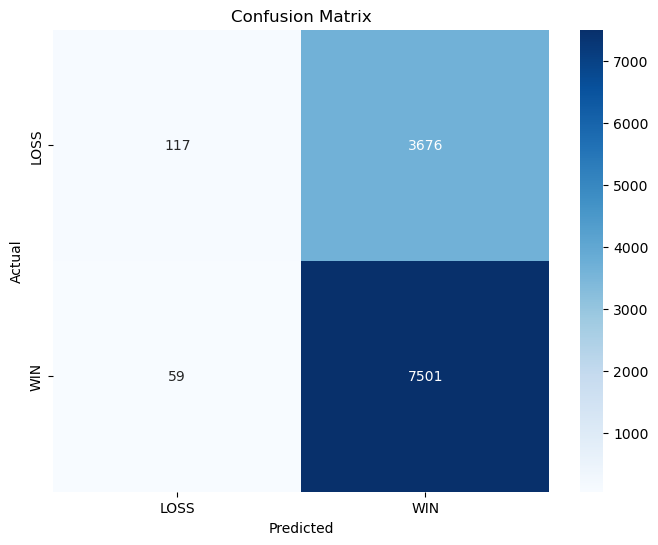

In [89]:

# مصفوفة الالتباس
conf_matrix = confusion_matrix(y_test, y_pred)

# رسم مصفوفة الالتباس
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[ 'LOSS', 'WIN'], yticklabels=[ 'LOSS', 'WIN'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [107]:
import pandas as pd

# قراءة أول 56763 صفًا فقط
data = pd.read_csv(
    r"C:\Users\Access\Downloads\AUDUSD-2019\AUDUSD_Candlestick_1_M_BID_2019-1-1_2024-11-18_ta_15-5.csv",
    nrows=56763
)

# حساب عدد الصفوف لكل جزء
total_rows = len(data)
half_rows = total_rows // 2
quarter_rows = total_rows // 4

# 1. أخذ النصف الأول
first_half = data[data['Result'] == "WIN"].iloc[:half_rows]

# 2. اختيار الربع الثالث (الصفوف التي يكون فيها Result = 0)
result_0 = data[data['Result'] == "NONE"].iloc[:quarter_rows]

# 3. اختيار الربع الأخير (الصفوف التي يكون فيها Result = 1)
result_1 = data[data['Result'] == "LOSS"].iloc[:quarter_rows]

# دمج جميع الأجزاء
final_data = pd.concat([first_half, result_0, result_1])

# عرض النتيجة
print(final_data)

# حفظ البيانات الجديدة إذا لزم الأمر
final_data.to_csv("filtered_data.csv", index=False)


                  Gmt time     Open     High      Low    Close   EMA_100  \
41     2019-01-01 22:41:00  0.70464  0.70481  0.70464  0.70480  0.704537   
91     2019-01-01 23:31:00  0.70466  0.70467  0.70445  0.70449  0.704641   
121    2019-01-02 00:01:00  0.70460  0.70461  0.70440  0.70440  0.704654   
180    2019-01-02 01:00:00  0.70403  0.70403  0.70394  0.70394  0.704294   
212    2019-01-02 01:32:00  0.70417  0.70417  0.70402  0.70402  0.704223   
...                    ...      ...      ...      ...      ...       ...   
56528  2019-02-14 02:08:00  0.71017  0.71026  0.71007  0.71007  0.709755   
56543  2019-02-14 02:23:00  0.71016  0.71026  0.71015  0.71022  0.709835   
56560  2019-02-14 02:40:00  0.71015  0.71015  0.70994  0.70997  0.709942   
56664  2019-02-14 04:24:00  0.71148  0.71149  0.71138  0.71138  0.711091   
56689  2019-02-14 04:49:00  0.71157  0.71157  0.71147  0.71148  0.711289   

         EMA_50    EMA_21    EMA_13     EMA_7     RSI_10    ATR_10    ATR_30  \
41     

In [116]:
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# 1. إعداد البيانات (افترض أن لديك بيانات عن الصفقات)
# هنا نفترض أن البيانات تحتوي على الأعمدة التالية (مثل المؤشرات الفنية مثل RSI، MACD، الأسعار)
# يمكن أن تستبدل هذه البيانات ببياناتك الفعلية

data = pd.read_csv("filtered_data.csv")

# تحديد فقط الصفقات الرابحة
# افترض أن لدينا عمود "Result" يحتوي على "WIN" و "LOSS" و "NONE"
# نقوم بتصفية البيانات للحصول على الصفقات الرابحة فقط
winning_data = data['Result']

# 2. تحضير البيانات لاستخدامها مع One-Class SVM
# نأخذ فقط الأعمدة التي تمثل الخصائص (من دون "Result")
X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]  # الميزات

# 3. قياس البيانات (من المهم أن تكون البيانات مقياسه بشكل جيد لـ One-Class SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. تدريب One-Class SVM
model = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')  # nu هو النسبة المئوية للبيانات التي يجب أن تكون شاذة
model.fit(X_scaled)

# 5. تصنيف الصفقة الجديدة
# افترض أن لديك بيانات جديدة للصفقات وتريد تصنيفها إذا كانت رابحة أو لا
# قراءة أول 56763 سطر فقط
new_data = pd.read_csv(
    "filtered_data.csv",
    nrows=56763
)
X_new = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]  # الميزات

# مقياس البيانات الجديدة
X_new_scaled = scaler.transform(X_new)

# التنبؤ بالصفقة الجديدة
predictions = model.predict(X_new_scaled)

# 6. تفسير النتائج
# النتيجة هي 1 إذا كانت الصفقة تتوافق مع نمط الصفقات الرابحة، و -1 إذا كانت لا تتوافق
# يمكنك تحويل هذه القيم إلى "رابحة" و "غير رابحة" مثلا
new_data['Prediction'] = ['Winning' if p == 1 else 'Not Winning' for p in predictions]

# عرض النتائج
print(new_data[['Prediction']])


        Prediction
0          Winning
1      Not Winning
2      Not Winning
3          Winning
4          Winning
...            ...
15893      Winning
15894      Winning
15895      Winning
15896      Winning
15897      Winning

[15898 rows x 1 columns]


In [117]:
# افتراض أن new_data قد يحتوي فقط على التوقعات مع العمود Prediction
# تأكد من أن new_data و data لديهما نفس عدد الصفوف
assert len(data) == len(new_data), "عدد الصفوف في data و new_data غير متطابق!"

# إضافة العمود 'Result' من data إلى new_data
new_data['Result'] = data['Result'].values

# إجراء مقارنة بين القيم الحقيقية (Result) والتوقعات (Prediction)
comparison = new_data[['Result', 'Prediction']]

# حساب الدقة
correct_predictions = (new_data['Result'] == new_data['Prediction']).sum()
accuracy = correct_predictions / len(new_data) * 100

print(f"Accuracy of predictions: {accuracy:.2f}%")
print(comparison.head())


Accuracy of predictions: 0.00%
  Result   Prediction
0    WIN      Winning
1    WIN  Not Winning
2    WIN  Not Winning
3    WIN      Winning
4    WIN      Winning


In [118]:
comparison[9000:9060]

,Result,Prediction
9000,NONE,Winning
9001,NONE,Winning
9002,NONE,Winning
9003,NONE,Winning
9004,NONE,Winning
9005,NONE,Winning
9006,NONE,Winning
9007,NONE,Winning
9008,NONE,Winning
9009,NONE,Winning


In [99]:
new_data

,Gmt time,Open,High,Low,Close,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result,Prediction
0,2019-01-01 22:00:00,0.70519,0.70519,0.70519,0.70519,0.704112,0.704133,0.704190,0.704247,0.704365,100.000000,0.000110,0.000037,0,0.0,0.0,NONE,Winning
1,2019-01-01 22:01:00,0.70520,0.70520,0.70520,0.70520,0.704133,0.704175,0.704282,0.704383,0.704574,100.000000,0.000100,0.000036,0,0.0,0.0,NONE,Winning
2,2019-01-01 22:02:00,0.70519,0.70519,0.70463,0.70465,0.704144,0.704194,0.704315,0.704421,0.704593,62.068966,0.000147,0.000054,0,0.0,0.0,NONE,Winning
3,2019-01-01 22:03:00,0.70465,0.70466,0.70459,0.70460,0.704153,0.704210,0.704341,0.704447,0.704595,59.778598,0.000139,0.000054,0,0.0,0.0,NONE,Winning
4,2019-01-01 22:04:00,0.70477,0.70477,0.70476,0.70477,0.704165,0.704232,0.704380,0.704493,0.704638,64.699532,0.000142,0.000058,0,0.0,0.0,NONE,Winning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56758,2019-02-14 05:58:00,0.71232,0.71233,0.71218,0.71220,0.711792,0.711993,0.712133,0.712183,0.712224,55.795963,0.000084,0.000082,0,0.0,0.0,NONE,Winning
56759,2019-02-14 05:59:00,0.71220,0.71220,0.71210,0.71216,0.711800,0.711999,0.712135,0.712180,0.712208,51.479405,0.000085,0.000083,0,0.0,0.0,NONE,Winning
56760,2019-02-14 06:00:00,0.71216,0.71217,0.71203,0.71206,0.711805,0.712002,0.712128,0.712163,0.712171,42.373440,0.000091,0.000085,0,0.0,0.0,NONE,Winning
56761,2019-02-14 06:01:00,0.71206,0.71209,0.71193,0.71195,0.711808,0.712000,0.712112,0.712132,0.712116,34.841035,0.000098,0.000087,0,0.0,0.0,NONE,Winning


In [100]:
new_data = pd.read_csv(
    r"C:\Users\Access\Downloads\AUDUSD-2019\AUDUSD_Candlestick_1_M_BID_2019-1-1_2024-11-18_ta_15-5.csv",
    nrows=56763
)

In [101]:
new_data

,Gmt time,Open,High,Low,Close,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result
0,2019-01-01 22:00:00,0.70519,0.70519,0.70519,0.70519,0.704112,0.704133,0.704190,0.704247,0.704365,100.000000,0.000110,0.000037,0,0.0,0.0,NONE
1,2019-01-01 22:01:00,0.70520,0.70520,0.70520,0.70520,0.704133,0.704175,0.704282,0.704383,0.704574,100.000000,0.000100,0.000036,0,0.0,0.0,NONE
2,2019-01-01 22:02:00,0.70519,0.70519,0.70463,0.70465,0.704144,0.704194,0.704315,0.704421,0.704593,62.068966,0.000147,0.000054,0,0.0,0.0,NONE
3,2019-01-01 22:03:00,0.70465,0.70466,0.70459,0.70460,0.704153,0.704210,0.704341,0.704447,0.704595,59.778598,0.000139,0.000054,0,0.0,0.0,NONE
4,2019-01-01 22:04:00,0.70477,0.70477,0.70476,0.70477,0.704165,0.704232,0.704380,0.704493,0.704638,64.699532,0.000142,0.000058,0,0.0,0.0,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56758,2019-02-14 05:58:00,0.71232,0.71233,0.71218,0.71220,0.711792,0.711993,0.712133,0.712183,0.712224,55.795963,0.000084,0.000082,0,0.0,0.0,NONE
56759,2019-02-14 05:59:00,0.71220,0.71220,0.71210,0.71216,0.711800,0.711999,0.712135,0.712180,0.712208,51.479405,0.000085,0.000083,0,0.0,0.0,NONE
56760,2019-02-14 06:00:00,0.71216,0.71217,0.71203,0.71206,0.711805,0.712002,0.712128,0.712163,0.712171,42.373440,0.000091,0.000085,0,0.0,0.0,NONE
56761,2019-02-14 06:01:00,0.71206,0.71209,0.71193,0.71195,0.711808,0.712000,0.712112,0.712132,0.712116,34.841035,0.000098,0.000087,0,0.0,0.0,NONE


In [103]:
data

,Gmt time,Open,High,Low,Close,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result
0,2023-06-09 10:24:00,0.67092,0.67092,0.67088,0.67091,0.671114,0.671036,0.670912,0.670902,0.670909,50.359207,0.000090,0.000105,0,0.00000,0.00000,0
1,2023-10-12 19:29:00,0.63145,0.63147,0.63140,0.63146,0.631493,0.631395,0.631405,0.631420,0.631429,55.981288,0.000101,0.000119,0,0.00000,0.00000,0
2,2020-10-06 04:05:00,0.71874,0.71885,0.71874,0.71877,0.719012,0.718994,0.718843,0.718765,0.718729,47.681984,0.000204,0.000217,0,0.00000,0.00000,0
3,2023-11-30 19:26:00,0.66043,0.66047,0.66037,0.66044,0.660931,0.660695,0.660647,0.660633,0.660575,33.566546,0.000116,0.000122,0,0.00000,0.00000,0
4,2024-05-01 12:26:00,0.64883,0.64888,0.64873,0.64886,0.648190,0.648317,0.648484,0.648571,0.648674,72.829734,0.000165,0.000123,0,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56758,2024-11-18 09:57:00,0.64583,0.64583,0.64571,0.64571,0.645881,0.645851,0.645892,0.645884,0.645857,35.750566,0.000134,0.000138,-1,0.64433,0.64633,2
56759,2024-11-18 11:55:00,0.64522,0.64522,0.64506,0.64506,0.645434,0.645257,0.645159,0.645157,0.645156,41.756704,0.000101,0.000111,-1,0.64372,0.64572,2
56760,2024-11-18 11:57:00,0.64521,0.64521,0.64506,0.64508,0.645423,0.645249,0.645157,0.645154,0.645149,44.883570,0.000113,0.000115,-1,0.64371,0.64571,2
56761,2024-11-18 13:00:00,0.64513,0.64518,0.64508,0.64508,0.645407,0.645237,0.645154,0.645150,0.645143,45.014905,0.000109,0.000113,-1,0.64363,0.64563,2


In [119]:
import sys
!{sys.executable} -m pip install -U pip --user
!{sys.executable} -m pip install -U codeium-jupyter --user

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 660.6 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.8 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.8 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/1.8 MB 1.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.8 MB 841.6 kB/s eta 0:00:02
   ----- ---------------------------------- 0.3/1.8 MB 962.4 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.8 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.8 MB 995.6 kB/s eta 0:00:02
   --------- ------------------------------ 0.5/1.8 MB 1.1 MB/s eta 0:00:02
   ----------- ---------------------------- 0.5/1.8 MB 1.2 MB/s eta 0:00:02
   -------------- ------------------------- 0.6/1.8 MB 1.3 MB/s eta 0:00:01
   ---------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import pandas as pd
import pandas_ta as ta

# بياناتك الأصلية: Open, High, Low, Close, Volume
data = pd.read_csv(r"C:\Users\Access\Downloads\AUDUSD-2019\AUDUSD_Candlestick_1_M_BID_2019-1-1_2024-11-18.csv")

data = data[['Gmt time', 'Open', 'High', 'Low', 'Close']]


# حساب المؤشرات الفنية
data['EMA_10'] = ta.ema(data['Close'], length=10)  # المتوسط المتحرك الأسي لـ 10 فترات
data['RSI_14'] = ta.rsi(data['Close'], length=14)  # مؤشر القوة النسبية لـ 14 فترة
data['ATR_14'] = ta.atr(data['High'], data['Low'], data['Close'], length=14)  # متوسط المدى الحقيقي لـ 14 فترة

# حساب فجوات FVG بين الشمعة الحالية (T) والشمعة السابقة بسلمتين (T-2)
def calculate_fvg(current_row, previous_row, min_pips=5):
    if previous_row is None:
        return 0, 0  # إذا لم تكن هناك بيانات كافية
    fvg_size = previous_row['High'] - current_row['Low']
    if fvg_size >= min_pips * 0.0001:  # تحويل النقاط (بيب) إلى فرق سعري
        fvg_exists = 1
    else:
        fvg_exists = 0
        fvg_size = 0  # إذا كانت الفجوة أقل من 5 نقاط، يتم إزالتها
    return fvg_exists, fvg_size

# إنشاء أعمدة FVG
fvg_exists = []
fvg_size = []

for i in range(len(data)):
    if i < 2:  # الشموع الأولى ليس لها (T-2)
        fvg_exists.append(0)
        fvg_size.append(0)
    else:
        exists, size = calculate_fvg(data.iloc[i], data.iloc[i - 2], min_pips=5)
        fvg_exists.append(exists)
        fvg_size.append(size)

data['FVG_Exists'] = fvg_exists
data['FVG_Size'] = fvg_size

# عرض البيانات النهائية
print(data.head())


              Gmt time     Open     High      Low    Close  EMA_10  RSI_14  \
0  2019-01-01 00:00:00  0.70409  0.70409  0.70409  0.70409     NaN     NaN   
1  2019-01-01 00:01:00  0.70409  0.70409  0.70409  0.70409     NaN     NaN   
2  2019-01-01 00:02:00  0.70409  0.70409  0.70409  0.70409     NaN     NaN   
3  2019-01-01 00:03:00  0.70409  0.70409  0.70409  0.70409     NaN     NaN   
4  2019-01-01 00:04:00  0.70409  0.70409  0.70409  0.70409     NaN     NaN   

   ATR_14  FVG_Exists  FVG_Size  
0     NaN           0       0.0  
1     NaN           0       0.0  
2     NaN           0       0.0  
3     NaN           0       0.0  
4     NaN           0       0.0  


In [18]:
data[1350:]


,Gmt time,Open,High,Low,Close,EMA_10,RSI_14,ATR_14,FVG_Exists,FVG_Size
1350,2019-01-01 22:30:00,0.70517,0.70517,0.70516,0.70517,0.705023,72.578012,0.000081,0,0.0
1351,2019-01-01 22:31:00,0.70517,0.70518,0.70496,0.70500,0.705019,59.282248,0.000090,0,0.0
1352,2019-01-01 22:32:00,0.70501,0.70505,0.70496,0.70505,0.705024,61.515316,0.000090,0,0.0
1353,2019-01-01 22:33:00,0.70505,0.70522,0.70502,0.70504,0.705027,60.797164,0.000098,0,0.0
1354,2019-01-01 22:34:00,0.70506,0.70516,0.70505,0.70509,0.705039,63.115777,0.000100,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2079382,2024-11-18 21:55:00,0.65074,0.65075,0.65073,0.65073,0.650782,49.464998,0.000052,0,0.0
2079383,2024-11-18 21:56:00,0.65072,0.65074,0.65071,0.65072,0.650770,48.324088,0.000051,0,0.0
2079384,2024-11-18 21:57:00,0.65073,0.65073,0.65067,0.65069,0.650756,44.972818,0.000051,0,0.0
2079385,2024-11-18 21:58:00,0.65069,0.65075,0.65066,0.65072,0.650749,48.796896,0.000054,0,0.0


In [21]:
# حساب عدد المرات التي يظهر فيها الرقم 1 في FVG_Exists
fvg_count = data['FVG_Exists'].sum()

print(f"عدد المرات التي جاء فيها الرقم 1 في FVG_Exists: {fvg_count}")


عدد المرات التي جاء فيها الرقم 1 في FVG_Exists: 66907


In [1]:
import plotly.graph_objects as go
import pandas as pd



data = data.head(10000)

# تحويل عمود الوقت إلى نوع datetime
data['Gmt time'] = pd.to_datetime(data['Gmt time'])

# إنشاء الرسم البياني للشموع اليابانية
fig = go.Figure(data=[go.Candlestick(
    x=data['Gmt time'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'],
    name='OHLC'
)])

# إضافة مربعات عند كل FVG
for i in range(len(data)):
    if data.loc[i, 'FVG_Exists'] == 1:
        fvg_start = data.loc[i, 'Low']
        fvg_end = data.loc[i, 'High']
        time = data.loc[i, 'Gmt time']
        
        # إضافة مربع
        fig.add_shape(type="rect",
                      x0=time, x1=time + pd.Timedelta(minutes=1),  # مدة الشمعة 5 دقائق
                      y0=fvg_start, y1=fvg_end,
                      line=dict(color="blue", width=1),
                      fillcolor="rgba(0, 0, 255, 0.2)")  # شفاف بنسبة 20%

# تخصيص المحاور والعنوان
fig.update_layout(
    title="الرسم البياني للشموع اليابانية مع مربعات FVG",
    xaxis_title="الوقت (GMT)",
    yaxis_title="السعر",
    xaxis_rangeslider_visible=False  # إخفاء شريط التمرير الافتراضي
)

# عرض الرسم
fig.show()


NameError: name 'data' is not defined

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

class EURUSDScalper:
    def __init__(self):
        self.symbol = "EURUSD=X"
        self.lookback_period = 60  # 60 minutes lookback
        self.model = None
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.stop_loss_pips = 10  # 10 pips stop loss
        self.take_profit_pips = 15  # 15 pips take profit
        
    def fetch_data(self, days=30):
        """جلب بيانات اليورو/دولار"""
        try:
            print(f"جاري تحميل بيانات {self.symbol} لآخر {days} يوم...")
            end_date = datetime.now()
            start_date = end_date - timedelta(days=days)
            
            # استخدام فترة صالحة
            data = yf.download(
                self.symbol, 
                start=start_date, 
                end=end_date, 
                interval='1h'  # استخدام فترة ساعة بدلاً من دقيقة
            )
            
            if len(data) == 0:
                raise ValueError("لم يتم العثور على بيانات للرمز المحدد")
                
            print(f"تم تحميل {len(data)} شمعة")
            return data
            
        except Exception as e:
            print(f"خطأ في تحميل البيانات: {str(e)}")
            # محاولة استخدام رمز بديل
            try:
                print("محاولة استخدام EUR=X...")
                self.symbol = "EUR=X"
                data = yf.download(
                    self.symbol,
                    start=start_date,
                    end=end_date,
                    interval='1h'
                )
                if len(data) > 0:
                    print(f"تم تحميل {len(data)} شمعة")
                    return data
                else:
                    raise ValueError("لم يتم العثور على بيانات")
            except Exception as e2:
                print(f"فشل في تحميل البيانات البديلة: {str(e2)}")
                return None
    
    def calculate_technical_indicators(self, data):
        """حساب المؤشرات الفنية"""
        print("حساب المؤشرات الفنية...")
        df = data.copy()
        
        # المتوسطات المتحركة
        df['MA20'] = df['Close'].rolling(window=20).mean()
        df['MA50'] = df['Close'].rolling(window=50).mean()
        
        # حساب التقلب
        df['Volatility'] = df['Close'].rolling(window=20).std()
        
        # حساب مؤشر القوة النسبية RSI
        delta = df['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        df['RSI'] = 100 - (100 / (1 + rs))
        
        # إضافة مؤشر MACD
        exp1 = df['Close'].ewm(span=12, adjust=False).mean()
        exp2 = df['Close'].ewm(span=26, adjust=False).mean()
        df['MACD'] = exp1 - exp2
        df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
        
        # إضافة Bollinger Bands
        middle_band = df['Close'].rolling(window=20).mean()
        bb_std = df['Close'].rolling(window=20).std()
        df['BB_Upper'] = middle_band + (bb_std * 2)
        df['BB_Lower'] = middle_band - (bb_std * 2)
        
        # إضافة مؤشر Stochastic
        low_14 = df['Close'].rolling(window=14).min()
        high_14 = df['Close'].rolling(window=14).max()
        df['%K'] = ((df['Close'] - low_14) * 100) / (high_14 - low_14 + 1e-14)  # تجنب القسمة على صفر
        df['%D'] = df['%K'].rolling(window=3).mean()
        
        return df
    
    def prepare_features(self, data):
        """إعداد المؤشرات الفنية"""
        df = self.calculate_technical_indicators(data)
        
        # حذف الصفوف التي تحتوي على قيم NaN
        df = df.dropna()
        
        return df
    
    def create_sequences(self, data):
        """إنشاء متواليات للتدريب"""
        try:
            features = data[['Close', 'Volume', 'MA20', 'MA50', 'Volatility', 'RSI', 'MACD', '%K']].values
            
            # تأكد من عدم وجود قيم NaN
            if np.isnan(features).any():
                print("تنبيه: تم العثور على قيم مفقودة، جاري معالجتها...")
                features = np.nan_to_num(features, nan=0)
            
            scaled_features = self.scaler.fit_transform(features)
            
            X, y = [], []
            for i in range(self.lookback_period, len(scaled_features)):
                X.append(scaled_features[i-self.lookback_period:i])
                y.append(scaled_features[i, 0])  # التنبؤ بسعر الإغلاق التالي
                
            X = np.array(X)
            y = np.array(y)
            
            if len(X) == 0:
                raise ValueError("لا توجد بيانات كافية لإنشاء المتواليات")
                
            print(f"تم إنشاء {len(X)} متوالية للتدريب")
            return X, y
            
        except Exception as e:
            print(f"خطأ في إنشاء المتواليات: {str(e)}")
            return np.array([]), np.array([])
    
    def build_model(self):
        """بناء نموذج LSTM"""
        model = Sequential([
            LSTM(100, return_sequences=True, input_shape=(self.lookback_period, 8)),
            Dropout(0.2),
            LSTM(100, return_sequences=True),
            Dropout(0.2),
            LSTM(50, return_sequences=False),
            Dropout(0.2),
            Dense(1)
        ])
        
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        self.model = model
        return model
    
    def train_model(self, X_train, y_train, epochs=50, batch_size=32):
        """تدريب النموذج"""
        print("بدء تدريب النموذج...")
        history = self.model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.1,
            verbose=1
        )
        
        # حفظ النموذج
        self.model.save('eurusd_model.h5')
        return history
    
    def plot_training_history(self, history):
        """رسم نتائج التدريب"""
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('نموذج الخسارة')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['mae'], label='MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title('متوسط الخطأ المطلق')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()
        
        plt.tight_layout()
        plt.savefig('training_history.png')
        plt.close()
    
    def generate_signals(self, data, threshold=0.0001):
        """توليد إشارات التداول"""
        features = data[['Close', 'Volume', 'MA20', 'MA50', 'Volatility', 'RSI', 'MACD', '%K']].values
        scaled_features = self.scaler.transform(features)
        
        signals = pd.DataFrame(index=data.index)
        signals['Close'] = data['Close']
        signals['Signal'] = 0
        signals['Predicted_Price'] = np.nan
        
        print("توليد إشارات التداول...")
        for i in range(self.lookback_period, len(scaled_features)):
            try:
                X = scaled_features[i-self.lookback_period:i].reshape(1, self.lookback_period, 8)
                pred = self.model.predict(X, verbose=0)
                
                pred_reshaped = pred.reshape(-1, 1)
                remaining_features = scaled_features[i, 1:].reshape(1, -1)
                combined_features = np.hstack([pred_reshaped, remaining_features])
                
                pred_price = self.scaler.inverse_transform(combined_features)[0][0]
                
                current_index = signals.index[i]
                signals.loc[current_index, 'Predicted_Price'] = pred_price
                current_price = data.loc[current_index, 'Close'].iloc[0]
                price_diff = pred_price - current_price
                
                # تحسين معايير الدخول والخروج باستخدام مؤشرات متعددة
                current_rsi = data.loc[current_index, 'RSI'].iloc[0]
                current_macd = data.loc[current_index, 'MACD'].iloc[0]
                current_signal = data.loc[current_index, 'Signal_Line'].iloc[0]
                current_k = data.loc[current_index, '%K'].iloc[0]
                current_d = data.loc[current_index, '%D'].iloc[0]
                current_bb_upper = data.loc[current_index, 'BB_Upper'].iloc[0]
                current_bb_lower = data.loc[current_index, 'BB_Lower'].iloc[0]
                
                # شروط الشراء المحسنة
                buy_conditions = (
                    price_diff > threshold and
                    current_rsi < 70 and current_rsi > 30 and  # تجنب التشبع
                    current_macd > current_signal and  # إشارة MACD إيجابية
                    current_k > current_d and  # إشارة Stochastic إيجابية
                    current_price < current_bb_lower  # السعر تحت الحد السفلي لـ Bollinger
                )
                
                # شروط البيع المحسنة
                sell_conditions = (
                    price_diff < -threshold and
                    current_rsi > 30 and current_rsi < 70 and  # تجنب التشبع
                    current_macd < current_signal and  # إشارة MACD سلبية
                    current_k < current_d and  # إشارة Stochastic سلبية
                    current_price > current_bb_upper  # السعر فوق الحد العلوي لـ Bollinger
                )
                
                if buy_conditions:
                    signals.loc[current_index, 'Signal'] = 1
                elif sell_conditions:
                    signals.loc[current_index, 'Signal'] = -1
                    
            except Exception as e:
                print(f"خطأ في توليد الإشارة للنقطة {i}: {str(e)}")
                continue
                
        buy_signals = len(signals[signals['Signal'] == 1])
        sell_signals = len(signals[signals['Signal'] == -1])
        print(f"تم توليد {buy_signals} إشارة شراء و {sell_signals} إشارة بيع")
        
        return signals
    
    def run_backtest(self, signals):
        """اختبار الاستراتيجية"""
        positions = pd.DataFrame(index=signals.index)
        positions['Position'] = 0
        positions['Price'] = signals['Close']
        positions['Profit_Pips'] = 0.0
        
        current_position = 0
        entry_price = 0
        
        for i in range(len(signals)):
            if current_position == 0:  # لا يوجد مركز مفتوح
                if signals.loc[signals.index[i], 'Signal'] == 1:  # إشارة شراء
                    current_position = 1
                    entry_price = signals.loc[signals.index[i], 'Close']
                    positions.loc[signals.index[i], 'Position'] = 1
                elif signals.loc[signals.index[i], 'Signal'] == -1:  # إشارة بيع
                    current_position = -1
                    entry_price = signals.loc[signals.index[i], 'Close']
                    positions.loc[signals.index[i], 'Position'] = -1
            
            elif current_position != 0:  # مركز مفتوح
                price_diff = (signals.loc[signals.index[i], 'Close'] - entry_price) * 10000  # تحويل إلى نقاط
                
                if current_position == 1:  # مركز شراء
                    if price_diff >= self.take_profit_pips or price_diff <= -self.stop_loss_pips:
                        positions.loc[signals.index[i], 'Profit_Pips'] = price_diff
                        current_position = 0
                        entry_price = 0
                
                elif current_position == -1:  # مركز بيع
                    if -price_diff >= self.take_profit_pips or -price_diff <= -self.stop_loss_pips:
                        positions.loc[signals.index[i], 'Profit_Pips'] = -price_diff
                        current_position = 0
                        entry_price = 0
        
        return positions
    
    def plot_results(self, data, signals, positions):
        """رسم النتائج"""
        plt.figure(figsize=(15, 10))
        
        # رسم الأسعار والإشارات
        plt.subplot(2, 1, 1)
        plt.plot(data.index, data['Close'], label='سعر الإغلاق', alpha=0.7)
        plt.plot(signals.index, signals['Predicted_Price'], label='السعر المتوقع', alpha=0.7)
        
        # تحديد نقاط الدخول والخروج
        buy_points = positions[positions['Position'] == 1]
        sell_points = positions[positions['Position'] == -1]
        
        plt.scatter(buy_points.index, buy_points['Price'], 
                   marker='^', color='g', label='شراء', alpha=1)
        plt.scatter(sell_points.index, sell_points['Price'], 
                   marker='v', color='r', label='بيع', alpha=1)
        
        plt.title('إشارات التداول على اليورو/دولار')
        plt.xlabel('الوقت')
        plt.ylabel('السعر')
        plt.legend()
        
        # رسم الأرباح التراكمية
        plt.subplot(2, 1, 2)
        cumulative_pips = positions['Profit_Pips'].cumsum()
        plt.plot(cumulative_pips.index, cumulative_pips, label='الأرباح التراكمية بالنقاط')
        plt.title('الأرباح التراكمية')
        plt.xlabel('الوقت')
        plt.ylabel('النقاط')
        plt.legend()
        
        plt.tight_layout()
        plt.savefig('trading_results.png')
        plt.close()

def main():
    # تهيئة الاستراتيجية
    strategy = EURUSDScalper()
    
    # جلب وإعداد البيانات
    data = strategy.fetch_data(days=30)
    if data is None or len(data) == 0:
        print("لم نتمكن من تحميل البيانات. يرجى التحقق من اتصال الإنترنت والرمز المستخدم.")
        return
        
    data = strategy.prepare_features(data)
    
    # إنشاء وتدريب النموذج
    X, y = strategy.create_sequences(data)
    if len(X) == 0:
        print("لا توجد بيانات كافية للتدريب")
        return
        
    split_idx = int(len(X) * 0.8)
    X_train, y_train = X[:split_idx], y[:split_idx]
    
    strategy.build_model()
    history = strategy.train_model(X_train, y_train, epochs=50)
    strategy.plot_training_history(history)
    
    # توليد الإشارات واختبار الاستراتيجية
    signals = strategy.generate_signals(data)
    positions = strategy.run_backtest(signals)
    
    # عرض النتائج
    total_pips = positions['Profit_Pips'].sum()
    winning_trades = len(positions[positions['Profit_Pips'] > 0])
    total_trades = len(positions[positions['Profit_Pips'] != 0])
    
    if total_trades > 0:
        print("\n=== نتائج الاختبار ===")
        print(f"إجمالي الأرباح بالنقاط: {total_pips:.2f}")
        print(f"عدد الصفقات الرابحة: {winning_trades}")
        print(f"إجمالي عدد الصفقات: {total_trades}")
        print(f"نسبة الصفقات الرابحة: {(winning_trades/total_trades*100):.2f}%")
        
        # رسم النتائج
        strategy.plot_results(data, signals, positions)
    else:
        print("لم يتم العثور على صفقات كافية للتحليل")

if __name__ == "__main__":
    main()


جاري تحميل بيانات EURUSD=X لآخر 30 يوم...


[*********************100%***********************]  1 of 1 completed

تم تحميل 494 شمعة
حساب المؤشرات الفنية...
تم إنشاء 385 متوالية للتدريب
بدء تدريب النموذج...
Epoch 1/50



C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - loss: 0.0572 - mae: 0.1808 - val_loss: 0.0070 - val_mae: 0.0730
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0105 - mae: 0.0839 - val_loss: 0.0037 - val_mae: 0.0499
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0057 - mae: 0.0600 - val_loss: 0.0019 - val_mae: 0.0341
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0050 - mae: 0.0571 - val_loss: 0.0027 - val_mae: 0.0426
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0041 - mae: 0.0509 - val_loss: 0.0021 - val_mae: 0.0365
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0051 - mae: 0.0568 - val_loss: 0.0029 - val_mae: 0.0467
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0047 - mae: 0.0547 - val_loss: 0.0023 - val_mae: 0.0405
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0040 - mae: 0.0498 - val_loss: 0.0023 - val_mae: 0.0405
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0040 - mae: 0.0521 - val_loss: 

توليد إشارات التداول...
تم توليد 0 إشارة شراء و 0 إشارة بيع
لم يتم العثور على صفقات كافية للتحليل


In [4]:
pip install yfinance 

Defaulting to user installation because normal site-packages is not writeable
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------------------------- ------ 786.4/948.2 kB 699.0 kB/s eta 0:00:01
     ------------------------------------ 948.2/948.2 kB 861.9 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with statu

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

class EURUSDScalper:
    def __init__(self):
        self.symbol = "EURUSD=X"
        self.lookback_period = 60  # 60 minutes lookback
        self.model = None
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.stop_loss_pips = 10  # 10 pips stop loss
        self.take_profit_pips = 15  # 15 pips take profit
        
    def fetch_data(self, days=30):
        """جلب بيانات اليورو/دولار"""
        try:
            print(f"جاري تحميل بيانات {self.symbol} لآخر {days} يوم...")
            end_date = datetime.now()
            start_date = end_date - timedelta(days=days)
            
            # استخدام فترة صالحة
            data = yf.download(
                self.symbol, 
                start=start_date, 
                end=end_date, 
                interval='1h'  # استخدام فترة ساعة بدلاً من دقيقة
            )
            
            if len(data) == 0:
                raise ValueError("لم يتم العثور على بيانات للرمز المحدد")
                
            print(f"تم تحميل {len(data)} شمعة")
            return data
            
        except Exception as e:
            print(f"خطأ في تحميل البيانات: {str(e)}")
            # محاولة استخدام رمز بديل
            try:
                print("محاولة استخدام EUR=X...")
                self.symbol = "EUR=X"
                data = yf.download(
                    self.symbol,
                    start=start_date,
                    end=end_date,
                    interval='1h'
                )
                if len(data) > 0:
                    print(f"تم تحميل {len(data)} شمعة")
                    return data
                else:
                    raise ValueError("لم يتم العثور على بيانات")
            except Exception as e2:
                print(f"فشل في تحميل البيانات البديلة: {str(e2)}")
                return None
    
    def calculate_technical_indicators(self, data):
        """حساب المؤشرات الفنية"""
        print("حساب المؤشرات الفنية...")
        df = data.copy()
        
        # المتوسطات المتحركة
        df['MA20'] = df['Close'].rolling(window=20).mean()
        df['MA50'] = df['Close'].rolling(window=50).mean()
        
        # حساب التقلب
        df['Volatility'] = df['Close'].rolling(window=20).std()
        
        # حساب مؤشر القوة النسبية RSI
        delta = df['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        df['RSI'] = 100 - (100 / (1 + rs))
        
        # إضافة مؤشر MACD
        exp1 = df['Close'].ewm(span=12, adjust=False).mean()
        exp2 = df['Close'].ewm(span=26, adjust=False).mean()
        df['MACD'] = exp1 - exp2
        df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
        
        # إضافة Bollinger Bands
        middle_band = df['Close'].rolling(window=20).mean()
        bb_std = df['Close'].rolling(window=20).std()
        df['BB_Upper'] = middle_band + (bb_std * 2)
        df['BB_Lower'] = middle_band - (bb_std * 2)
        
        # إضافة مؤشر Stochastic
        low_14 = df['Close'].rolling(window=14).min()
        high_14 = df['Close'].rolling(window=14).max()
        df['%K'] = ((df['Close'] - low_14) * 100) / (high_14 - low_14 + 1e-14)  # تجنب القسمة على صفر
        df['%D'] = df['%K'].rolling(window=3).mean()
        
        return df
    
    def prepare_features(self, data):
        """إعداد المؤشرات الفنية"""
        df = self.calculate_technical_indicators(data)
        
        # حذف الصفوف التي تحتوي على قيم NaN
        df = df.dropna()
        
        return df
    
    def create_sequences(self, data):
        """إنشاء متواليات للتدريب"""
        try:
            features = data[['Close', 'Volume', 'MA20', 'MA50', 'Volatility', 'RSI', 'MACD', '%K']].values
            
            # تأكد من عدم وجود قيم NaN
            if np.isnan(features).any():
                print("تنبيه: تم العثور على قيم مفقودة، جاري معالجتها...")
                features = np.nan_to_num(features, nan=0)
            
            scaled_features = self.scaler.fit_transform(features)
            
            X, y = [], []
            for i in range(self.lookback_period, len(scaled_features)):
                X.append(scaled_features[i-self.lookback_period:i])
                y.append(scaled_features[i, 0])  # التنبؤ بسعر الإغلاق التالي
                
            X = np.array(X)
            y = np.array(y)
            
            if len(X) == 0:
                raise ValueError("لا توجد بيانات كافية لإنشاء المتواليات")
                
            print(f"تم إنشاء {len(X)} متوالية للتدريب")
            return X, y
            
        except Exception as e:
            print(f"خطأ في إنشاء المتواليات: {str(e)}")
            return np.array([]), np.array([])
    
    def build_model(self):
        """بناء نموذج LSTM"""
        model = Sequential([
            LSTM(100, return_sequences=True, input_shape=(self.lookback_period, 8)),
            Dropout(0.2),
            LSTM(100, return_sequences=True),
            Dropout(0.2),
            LSTM(50, return_sequences=False),
            Dropout(0.2),
            Dense(1)
        ])
        
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        self.model = model
        return model
    
    def train_model(self, X_train, y_train, epochs=50, batch_size=32):
        """تدريب النموذج"""
        print("بدء تدريب النموذج...")
        history = self.model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.1,
            verbose=1
        )
        
        # حفظ النموذج
        self.model.save('eurusd_model.h5')
        return history
    
    def plot_training_history(self, history):
        """رسم نتائج التدريب"""
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('نموذج الخسارة')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['mae'], label='MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title('متوسط الخطأ المطلق')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()
        
        plt.tight_layout()
        plt.savefig('training_history.png')
        plt.close()
    
    def generate_signals(self, data, threshold=0.0001):
        """توليد إشارات التداول"""
        features = data[['Close', 'Volume', 'MA20', 'MA50', 'Volatility', 'RSI', 'MACD', '%K']].values
        scaled_features = self.scaler.transform(features)
        
        signals = pd.DataFrame(index=data.index)
        signals['Close'] = data['Close']
        signals['Signal'] = 0
        signals['Predicted_Price'] = np.nan
        
        print("توليد إشارات التداول...")
        for i in range(self.lookback_period, len(scaled_features)):
            try:
                X = scaled_features[i-self.lookback_period:i].reshape(1, self.lookback_period, 8)
                pred = self.model.predict(X, verbose=0)
                
                pred_reshaped = pred.reshape(-1, 1)
                remaining_features = scaled_features[i, 1:].reshape(1, -1)
                combined_features = np.hstack([pred_reshaped, remaining_features])
                
                pred_price = self.scaler.inverse_transform(combined_features)[0][0]
                
                current_index = signals.index[i]
                signals.loc[current_index, 'Predicted_Price'] = pred_price
                current_price = data.loc[current_index, 'Close'].iloc[0]
                price_diff = pred_price - current_price
                
                # تحسين معايير الدخول والخروج باستخدام مؤشرات متعددة
                current_rsi = data.loc[current_index, 'RSI'].iloc[0]
                current_macd = data.loc[current_index, 'MACD'].iloc[0]
                current_signal = data.loc[current_index, 'Signal_Line'].iloc[0]
                current_k = data.loc[current_index, '%K'].iloc[0]
                current_d = data.loc[current_index, '%D'].iloc[0]
                current_bb_upper = data.loc[current_index, 'BB_Upper'].iloc[0]
                current_bb_lower = data.loc[current_index, 'BB_Lower'].iloc[0]
                
                # شروط الشراء المحسنة
                buy_conditions = (
                    price_diff > threshold and
                    current_rsi < 70 and current_rsi > 30 and  # تجنب التشبع
                    current_macd > current_signal and  # إشارة MACD إيجابية
                    current_k > current_d and  # إشارة Stochastic إيجابية
                    current_price < current_bb_lower  # السعر تحت الحد السفلي لـ Bollinger
                )
                
                # شروط البيع المحسنة
                sell_conditions = (
                    price_diff < -threshold and
                    current_rsi > 30 and current_rsi < 70 and  # تجنب التشبع
                    current_macd < current_signal and  # إشارة MACD سلبية
                    current_k < current_d and  # إشارة Stochastic سلبية
                    current_price > current_bb_upper  # السعر فوق الحد العلوي لـ Bollinger
                )
                
                if buy_conditions:
                    signals.loc[current_index, 'Signal'] = 1
                elif sell_conditions:
                    signals.loc[current_index, 'Signal'] = -1
                    
            except Exception as e:
                print(f"خطأ في توليد الإشارة للنقطة {i}: {str(e)}")
                continue
                
        buy_signals = len(signals[signals['Signal'] == 1])
        sell_signals = len(signals[signals['Signal'] == -1])
        print(f"تم توليد {buy_signals} إشارة شراء و {sell_signals} إشارة بيع")
        
        return signals
    
    def run_backtest(self, signals):
        """اختبار الاستراتيجية"""
        positions = pd.DataFrame(index=signals.index)
        positions['Position'] = 0
        positions['Price'] = signals['Close']
        positions['Profit_Pips'] = 0.0
        
        current_position = 0
        entry_price = 0
        
        for i in range(len(signals)):
            if current_position == 0:  # لا يوجد مركز مفتوح
                if signals.loc[signals.index[i], 'Signal'] == 1:  # إشارة شراء
                    current_position = 1
                    entry_price = signals.loc[signals.index[i], 'Close']
                    positions.loc[signals.index[i], 'Position'] = 1
                elif signals.loc[signals.index[i], 'Signal'] == -1:  # إشارة بيع
                    current_position = -1
                    entry_price = signals.loc[signals.index[i], 'Close']
                    positions.loc[signals.index[i], 'Position'] = -1
            
            elif current_position != 0:  # مركز مفتوح
                price_diff = (signals.loc[signals.index[i], 'Close'] - entry_price) * 10000  # تحويل إلى نقاط
                
                if current_position == 1:  # مركز شراء
                    if price_diff >= self.take_profit_pips or price_diff <= -self.stop_loss_pips:
                        positions.loc[signals.index[i], 'Profit_Pips'] = price_diff
                        current_position = 0
                        entry_price = 0
                
                elif current_position == -1:  # مركز بيع
                    if -price_diff >= self.take_profit_pips or -price_diff <= -self.stop_loss_pips:
                        positions.loc[signals.index[i], 'Profit_Pips'] = -price_diff
                        current_position = 0
                        entry_price = 0
        
        return positions
    
    def plot_results(self, data, signals, positions):
        """رسم النتائج"""
        plt.figure(figsize=(15, 10))
        
        # رسم الأسعار والإشارات
        plt.subplot(2, 1, 1)
        plt.plot(data.index, data['Close'], label='سعر الإغلاق', alpha=0.7)
        plt.plot(signals.index, signals['Predicted_Price'], label='السعر المتوقع', alpha=0.7)
        
        # تحديد نقاط الدخول والخروج
        buy_points = positions[positions['Position'] == 1]
        sell_points = positions[positions['Position'] == -1]
        
        plt.scatter(buy_points.index, buy_points['Price'], 
                   marker='^', color='g', label='شراء', alpha=1)
        plt.scatter(sell_points.index, sell_points['Price'], 
                   marker='v', color='r', label='بيع', alpha=1)
        
        plt.title('إشارات التداول على اليورو/دولار')
        plt.xlabel('الوقت')
        plt.ylabel('السعر')
        plt.legend()
        
        # رسم الأرباح التراكمية
        plt.subplot(2, 1, 2)
        cumulative_pips = positions['Profit_Pips'].cumsum()
        plt.plot(cumulative_pips.index, cumulative_pips, label='الأرباح التراكمية بالنقاط')
        plt.title('الأرباح التراكمية')
        plt.xlabel('الوقت')
        plt.ylabel('النقاط')
        plt.legend()
        
        plt.tight_layout()
        plt.savefig('trading_results.png')
        plt.close()

def main():
    # تهيئة الاستراتيجية
    strategy = EURUSDScalper()
    
    # جلب وإعداد البيانات
    data = strategy.fetch_data(days=30)
    if data is None or len(data) == 0:
        print("لم نتمكن من تحميل البيانات. يرجى التحقق من اتصال الإنترنت والرمز المستخدم.")
        return
        
    data = strategy.prepare_features(data)
    
    # إنشاء وتدريب النموذج
    X, y = strategy.create_sequences(data)
    if len(X) == 0:
        print("لا توجد بيانات كافية للتدريب")
        return
        
    split_idx = int(len(X) * 0.8)
    X_train, y_train = X[:split_idx], y[:split_idx]
    
    strategy.build_model()
    history = strategy.train_model(X_train, y_train, epochs=50)
    strategy.plot_training_history(history)
    
    # توليد الإشارات واختبار الاستراتيجية
    signals = strategy.generate_signals(data)
    positions = strategy.run_backtest(signals)
    
    # عرض النتائج
    total_pips = positions['Profit_Pips'].sum()
    winning_trades = len(positions[positions['Profit_Pips'] > 0])
    total_trades = len(positions[positions['Profit_Pips'] != 0])
    
    if total_trades > 0:
        print("\n=== نتائج الاختبار ===")
        print(f"إجمالي الأرباح بالنقاط: {total_pips:.2f}")
        print(f"عدد الصفقات الرابحة: {winning_trades}")
        print(f"إجمالي عدد الصفقات: {total_trades}")
        print(f"نسبة الصفقات الرابحة: {(winning_trades/total_trades*100):.2f}%")
        
        # رسم النتائج
        strategy.plot_results(data, signals, positions)
    else:
        print("لم يتم العثور على صفقات كافية للتحليل")

if __name__ == "__main__":
    main()
strategy = FVGStrategy(
    symbol='EURUSD=X',  # الزوج
    timeframe='15m',    # الإطار الزمني
    min_gap_size=0.0005 # الحد الأدنى لحجم الفجوة
)

جاري تحميل بيانات EURUSD=X لآخر 30 يوم...


[*********************100%***********************]  1 of 1 completed
C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


تم تحميل 499 شمعة
حساب المؤشرات الفنية...
تم إنشاء 390 متوالية للتدريب
بدء تدريب النموذج...
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0944 - mae: 0.2393 - val_loss: 0.0163 - val_mae: 0.1142
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0103 - mae: 0.0835 - val_loss: 0.0041 - val_mae: 0.0484
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0068 - mae: 0.0646 - val_loss: 0.0031 - val_mae: 0.0455
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0065 - mae: 0.0640 - val_loss: 0.0049 - val_mae: 0.0552
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0051 - mae: 0.0562 - val_loss: 0.0037 - val_mae: 0.0479
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0046 - mae: 0.0548 - val_loss: 0.0039 - val_mae: 0.0504
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0036 - mae: 0.0497 - val_loss: 0.0037 - val_mae: 0.0498
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0047 - mae: 0.0544 - val_loss: 0.0032 - val_

توليد إشارات التداول...
تم توليد 0 إشارة شراء و 0 إشارة بيع
لم يتم العثور على صفقات كافية للتحليل


NameError: name 'FVGStrategy' is not defined

In [ ]:
import pandas as pd
import numpy as np

# تعريف دالة حساب السوبر تريند
def calculate_supertrend(df, period=14, multiplier=3):
    # حساب ATR
    df['ATR'] = df['High'].rolling(window=period).max() - df['Low'].rolling(window=period).min()
    
    # حساب قيمة Supertrend
    df['Basic_Upper_Band'] = (df['High'] + df['Low']) / 2 + multiplier * df['ATR']
    df['Basic_Lower_Band'] = (df['High'] + df['Low']) / 2 - multiplier * df['ATR']
    
    # تهيئة أعمدة للـ Supertrend
    df['Supertrend'] = 0.0
    
    for i in range(1, len(df)):
        if df['Close'].iloc[i] <= df['Basic_Upper_Band'].iloc[i-1]:
            df['Supertrend'].iloc[i] = df['Basic_Upper_Band'].iloc[i]
        else:
            df['Supertrend'].iloc[i] = df['Basic_Lower_Band'].iloc[i]
    
    return df

# دالة لإضافة الأعمدة على البيانات
def add_columns(df):
    # حساب السوبرتريند على الأطر الزمنية المختلفة
    df_15m = calculate_supertrend(df.resample('15min').last())  # بيانات 15 دقيقة
    df_5m = calculate_supertrend(df.resample('5min').last())    # بيانات 5 دقائق
    df_1m = calculate_supertrend(df.resample('1min').last())    # بيانات دقيقة واحدة
    
    # دمج الأعمدة الخاصة بالسوبرتريند
    df['Supertrend_15m'] = df_15m['Supertrend'].reindex(df.index, method='ffill')
    df['Supertrend_5m'] = df_5m['Supertrend'].reindex(df.index, method='ffill')
    df['Supertrend_1m'] = df_1m['Supertrend'].reindex(df.index, method='ffill')
    
    # حساب الإشارة (Signal) بناءً على اتجاه السوبرتريند
    df['Signal'] = 0
    df.loc[(df['Supertrend_15m'] < df['Close']) & (df['Supertrend_5m'] < df['Close']) & (df['Supertrend_1m'] < df['Close']), 'Signal'] = 1  # Buy
    df.loc[(df['Supertrend_15m'] > df['Close']) & (df['Supertrend_5m'] > df['Close']) & (df['Supertrend_1m'] > df['Close']), 'Signal'] = -1  # Sell
    
    # إضافة الأعمدة الخاصة بالدخول والخروج
    df['Entry_Price'] = np.nan
    df['Exit_Price'] = np.nan
    df['Trade_Result'] = np.nan
    df['Profit_Loss'] = np.nan
    
    # تحديد سعر الدخول والخروج بناءً على إشارة الشراء أو البيع
    for i in range(1, len(df)):
        if df['Signal'].iloc[i] == 1 and df['Signal'].iloc[i-1] != 1:
            df.loc[df.index[i], 'Entry_Price'] = df['Close'].iloc[i]
        if df['Signal'].iloc[i] == -1 and df['Signal'].iloc[i-1] != -1:
            df.loc[df.index[i], 'Entry_Price'] = df['Close'].iloc[i]
        if df['Signal'].iloc[i] != df['Signal'].iloc[i-1] and not pd.isna(df['Entry_Price'].iloc[i]):
            df.loc[df.index[i], 'Exit_Price'] = df['Close'].iloc[i]
            df.loc[df.index[i], 'Trade_Result'] = 'Win' if df['Signal'].iloc[i] == 1 and df['Exit_Price'].iloc[i] > df['Entry_Price'].iloc[i] else 'Loss'
            df.loc[df.index[i], 'Profit_Loss'] = (df['Exit_Price'].iloc[i] - df['Entry_Price'].iloc[i]) * 10000  # افتراض أن الحساب بالنقاط
    return df

# تطبيق الكود على البيانات
data = pd.read_csv(r'C:\Users\Access\Downloads\AUDUSD-2019\AUDUSD_Candlestick_1_M_BID_2019-1-1_2024-11-18.csv')  # تحميل بيانات OHLC من ملف CSV

# تحويل عمود الزمن إلى datetime إذا لم يكن بالفعل
data['Gmt time'] = pd.to_datetime(data['Gmt time'])

# تعيين العمود 'Gmt time' كـ index
data.set_index('Gmt time', inplace=True)

# تطبيق دالة add_columns
data = add_columns(data)

# عرض الأعمدة المطلوبة
print(data[['Supertrend_15m', 'Supertrend_5m', 'Supertrend_1m', 'Signal', 'Entry_Price', 'Exit_Price', 'Trade_Result', 'Profit_Loss']])
